# <font color='rosybrown'>**Customer Marketing Analytics: Segmentation and Prediction**</font>

**Author: Fitria Dwi Wulandari - February 20, 2024**

**Disclaimer.**
<br> This notebook was created as a final project for Business Intelligence Courses at dibimbing.id

## **Business Understanding**

iFood’s online food ordering and delivery services that brings customers, restaurants and delivery people together in a simple and practical way. iFood is widely used throughout Brazil and Colombia. Based in São Paulo, iFood maintains an 80% market share of the food delivery sector in Brazil. Keeping a high customer engagement is key for growing and consolidating the company’s position as the market leader.

iFood has several hundred thousands of registered customers and serves almost one million consumers annually. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and
regular products. The customers can order and obtain products through three sales channels: physical stores, company’s website, and catalogs.

Globally, the company had solid revenues in the past three years. But the profit growth prospects for the next three years are not promising. For this reason, companies need to consider several strategic initiatives to reverse this situation. One of them is to improve the performance of marketing activities, especially marketing campaigns.


## **Business Objectives**

The company’s want to uncover valuable information that could help drive and optimize sales campaigns. Furthermore, the company is interested in understanding the characteristic features of customers who are willing to buy their products. Based on this, the following are the scope from this project:
* Segment customers to organize them into specific groups based on shared characteristics, behaviors, or preferences. With this, companies can identify customers in each segment to maximize the value of each customer to the business.
* Build a model that predicts customer response to the next marketing campaign. This model will allow the company to select customers who are most likely to purchase the offer and ignore non-respondents, thereby making the next campaign more profitable.


## **Data Understanding**

The company has carried out five marketing campaigns, and will carry out the 6th campaign next month. Before launching the 6th campaign, the company randomly selected customers and contacted them by telephone about the campaign, with the aim that the company could identify areas that could be improved before launching the 6th campaign.

The sample dataset contains socio-demographic features and purchasing behavior of approximately 2,205 contacted customers. It also contains labels for customers who responded to the campaign by buying the product. A model will be developed with this sample data, and the results will be applied to the customer base so that marketing campaigns can focus more on specific customers.


**Customer Profiles**



---
* `Age`: Customer's age
* `marital_Divorced`: 1 if customer is divorced, 0 otherwise
* `marital_Widow`: 1 if customer is widow, 0 otherwise
* `marital_Single`: 1 if customer is single, 0 otherwise
* `marital_Married`: 1 if customer is married, 0 otherwise
* `marital_Together`: 1 if customer is together, 0 otherwise
* `education_Basic`: 1 if customer has primary education, 0 otherwise
* `education_2n Cycle`:  1 if customer has secondary education, 0 otherwise
* `education_Graduation`:  1 if customer has bachelor's degree, 0 otherwise
* `education_Master`:  1 if customer has master's degree, 0 otherwise
* `education_PhD`  |  1 if customer has doctoral's degree, 0 otherwise
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Customer_Days`: Number of days since registration as a customer
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if customer complained in the last 2 years, 0 otherwise

**Product Preferences**


---

* `MntWines`: Amount spent on wine in the last 2 years
* `MntFruits`: Amount spent on fruits in the last 2 years
* `MntMeatProducts`: Amount spent on meat in the last 2 years
* `MntFishProducts`: Amount spent on fish in the last 2 years
* `MntSweetProducts`: Amount spent on sweets in the last 2 years
* `MntGoldProds`: Amount spent on gold in the last 2 years
* `MntTotal`: Total amount spent on all the products

**Campaigns**


---

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise


**Channel Performance**


---

* `NumWebPurchases`: Number of purchases made through the company's web site
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company's web site in the last month


## **Data Preparation**

#### **Import Data and Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
pip install squarify

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
import squarify #treemap
import category_encoders as ce

In [ ]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from xgboost import XGBClassifier #xgboost
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score #roc score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
import io

auth.authenticate_user()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dibimbing/dataset/ifood_df.csv')

In [ ]:
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 2205 rows dan 39 columns.



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


#### **List of Features**

In [ ]:
# list of columns
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

#### **Features Types**

In [ ]:
# information about the type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

* All features are numeric.


#### **Feature's Unique Value**

In [ ]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

* The `Z_CostContact` and `Z_Revenue` features only have one unique value, meaning all values are the same. These feature will not help in understanding customers better so it can be removed.



In [ ]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

#### **Transformation**

##### **Total Dependents**

The total number of dependents in the house can be calculated from the sum of `Kidhome` and `Teenhome`

In [ ]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

##### **Dependent status**

The `Dependents` feature will be simplified to whether it has dependents or not, with 1 (yes) and 0 (no)

In [ ]:
df['Has_Dependent'] = np.where(df.Dependents > 0, 1, 0)

##### **Total Purchases**

Total purchases can be calculated from the sum of all purchases in each channel

In [ ]:
df['TotalPurchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases']

##### **Marital**

The data frame contains 5 columns to reflect marital status. We are going to create a new column `Marital` with values: Divorced, Married, Single, Together, Widow.

In [ ]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'

df['Marital'] = df.apply(get_marital_status, axis=1)

##### **LiveWith Status**

`Marital` feature will be simplified into 1 if the customer lives with someone else, 0 otherwise

In [ ]:
def get_livewith(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

df['LiveWith'] = df.apply(get_livewith, axis=1)

##### **Education**

The data frame contains 5 columns to reflect education status. We are going to create a new column `Education` with values: Primary, Secondary, Bachelor, Master, and Doctoral

In [ ]:
def get_education_status(row):
    if row['education_Basic'] == 1:
        return 'Primary'
    elif row['education_2n Cycle'] == 1:
        return 'Secondary'
    elif row['education_Graduation'] == 1:
        return 'Bachelor'
    elif row['education_Master'] == 1:
        return 'Master'
    elif row['education_PhD'] == 1:
        return 'Doctoral'
    else:
        return 'Unknown'

df['Education'] = df.apply(get_education_status, axis=1)

##### **Education Level**

`Education` feature will be simplified into 1 if customer has a degree, 0 otherwise

In [ ]:
def get_degree(row):
    if row['education_Graduation'] == 1:
        return 1
    elif row['education_Master'] == 1:
        return 1
    elif row['education_PhD'] == 1:
        return 1
    else:
        return 0

df['Has_Degree'] = df.apply(get_degree, axis=1)

In [ ]:
# preview of new features
df[['Dependents','Has_Dependent', 'TotalPurchases', 'Marital', 'LiveWith', 'Education', 'Has_Degree']].sample(5)

,Dependents,Has_Dependent,TotalPurchases,Marital,LiveWith,Education,Has_Degree
1304,1,1,22,Married,1,Master,1
1308,0,0,16,Together,1,Doctoral,1
379,2,1,8,Married,1,Bachelor,1
393,1,1,6,Single,0,Secondary,0
1454,1,1,25,Married,1,Doctoral,1


#### **Missing Value Detection**

In [ ]:
print('Status Missing Values :', df.isnull().values.any())
print('\nThe number of Missing Values for each columns:')
print(df.isnull().sum().sort_values(ascending=False))

Status Missing Values : False

The number of Missing Values for each columns:
Income                  0
Kidhome                 0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
Dependents              0
Has_Dependent           0
TotalPurchases          0
Marital                 0
LiveWith                0
Education               0
Customer_Days           0
Age                     0
Response                0
NumDealsPurchases       0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumWebPurchases         0
Complain                0
NumCatalogPu

* There is no missing values in the data frame

#### **Data Duplication Detection**

In [ ]:
# before correction
print('The number of duplicate data is', df.duplicated().sum())

The number of duplicate data is 184


In [ ]:
df = df.drop_duplicates()

# after correction
print('The number of duplicate data is', df.duplicated().sum())

The number of duplicate data is 0


* There are 184 duplicate records in the data frame so these duplicate records will be deleted

#### **Outlier Detection**

**Customer Profiles**

In [ ]:
# dataframe that only consist customer profiles features
df_profile = pd.DataFrame(df, columns=['Income',
                                 'Customer_Days',
                                 'Recency',
                                 'Kidhome',
                                 'Teenhome',
                                 'Age'])
df_profile.sample()

,Income,Customer_Days,Recency,Kidhome,Teenhome,Age
1164,26954.0,2211,17,1,0,49


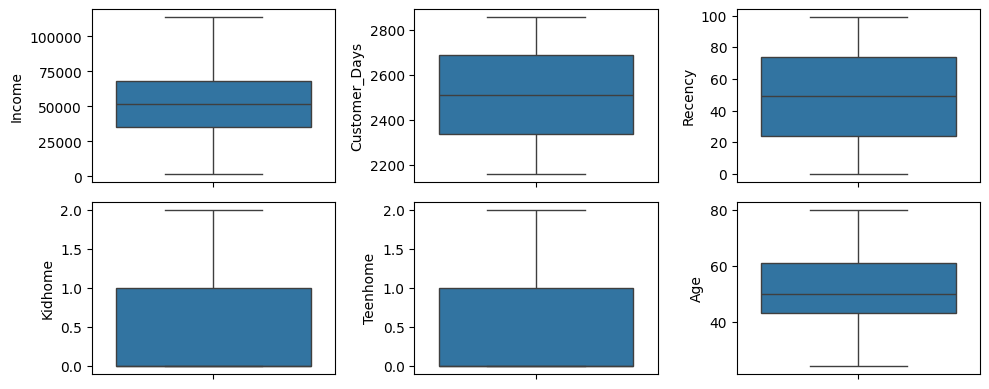

In [ ]:
# box-plot to detect outliers
fig = plt.figure(figsize=(10,4))

for i in range(len(df_profile.columns)):
    fig.add_subplot(2,3,i+1)
    sns.boxplot(y=df_profile.iloc[:,i])

plt.tight_layout()
plt.show()

* There are no outlier in the customer profile features


**Product Preferences**

In [ ]:
# dataframe that only consist product preferences features
df_product = pd.DataFrame(df, columns=['MntWines',
                             'MntFruits',
                             'MntMeatProducts',
                             'MntFishProducts',
                             'MntSweetProducts',
                             'MntGoldProds',
                             'MntTotal'])
df_product.sample()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
1211,23,0,11,2,1,3,37


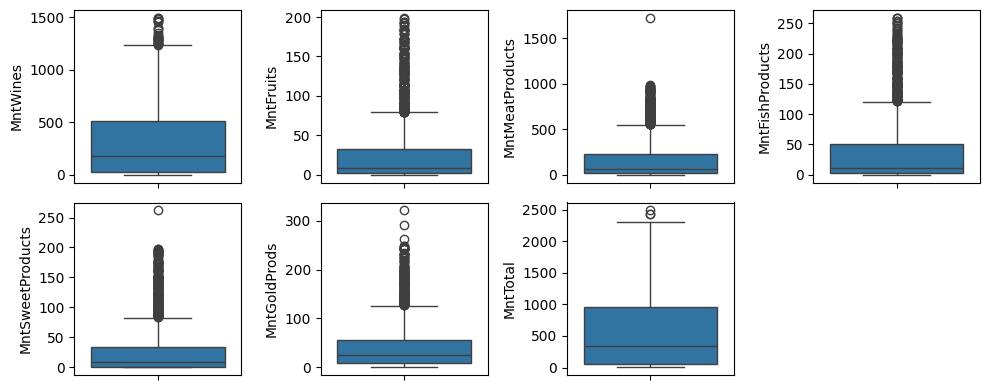

In [ ]:
# box-plot to detect outliers
fig = plt.figure(figsize=(10,4))

for i in range(len(df_product.columns)):
    fig.add_subplot(2,4,i+1)
    sns.boxplot(y=df_product.iloc[:,i])

plt.tight_layout()
plt.show()

* There doesn't seem to be any abnormality in the amount spent per product. Although, the box-plot diagram itself displays outliers. Such outliers represent natural variation in the data and should be left as they are in the data set
* It is natural that some customers may have a very sweet tooth or like to eat fruit

**Channel Performance**

In [ ]:
# dataframe that only consist channel performances features
df_channel = pd.DataFrame(df, columns=['NumWebPurchases',
                             'NumCatalogPurchases',
                             'NumStorePurchases',
                             'NumWebVisitsMonth'])
df_channel.sample()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
394,4,3,6,4


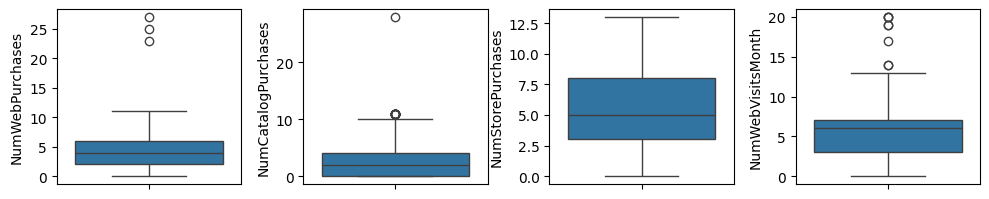

In [ ]:
# box-plot to detect outliers
fig = plt.figure(figsize=(10,4))

for i in range(len(df_channel.columns)):
    fig.add_subplot(2,4,i+1)
    sns.boxplot(y=df_channel.iloc[:,i])

plt.tight_layout()
plt.show()

* There also doesn't seem to be any abnormality in the number of purchases on each channel

## **Data Visualization**

In [ ]:
# preview after data preparation
df.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,Marital,LiveWith,Education,Has_Degree
135,23957.0,1,0,47,2,1,18,20,11,16,1,2,0,3,6,0,0,0,0,0,0,1,45,2768,0,1,0,0,0,0,0,1,0,0,52,36,0,1,1,5,Married,1,Bachelor,1
537,81698.0,0,0,4,179,28,520,111,123,47,1,3,8,13,1,0,0,0,0,0,0,1,71,2394,0,1,0,0,0,0,0,0,1,0,961,914,0,0,0,24,Married,1,Master,1
1402,43269.0,1,0,61,10,1,7,0,0,1,1,1,0,2,8,0,0,0,0,0,0,0,48,2445,0,1,0,0,0,0,0,0,0,1,18,17,0,1,1,3,Married,1,Doctoral,1
1908,75903.0,0,1,50,340,108,185,130,38,100,2,6,6,9,3,0,0,0,0,0,0,0,69,2606,0,1,0,0,0,0,0,1,0,0,801,701,0,1,1,21,Married,1,Bachelor,1
956,82576.0,0,0,66,1206,55,445,168,18,18,1,2,4,12,1,0,0,1,0,0,0,0,61,2856,0,0,0,1,0,0,0,0,1,0,1892,1874,1,0,0,18,Together,1,Master,1


In [ ]:
viz = df.copy()

##### **Customer Geographics**

In [ ]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases']

In [ ]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Age', 'Customer_Days', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Age,51.1
Customer_Days,2511.6
Income,51687.3
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,48.9


The average customer is...
* 51 years old
* Became a customer since 7 years ago
* Has an income of roughly $52,000 per year
* Has 1 dependent
* Made a purchase from our company in the last 49 days

##### **Campaign Performance**

***Latest campaign performance***

In [ ]:
decode_map = {0: "No", 1: "Yes"}
def decode_sentiment(label):
    return decode_map[int(label)]

viz['Response'] = viz['Response'].apply(lambda x: decode_sentiment(x))

In [ ]:
grp = viz.groupby('Response').size().reset_index()
grp.columns = ['Response','Amount']
grp['%'] = round(grp['Amount']*100/sum(grp['Amount']),2)
grp.sort_values(by='Amount', ascending=False)

,Response,Amount,%
0,No,1710,84.61
1,Yes,311,15.39


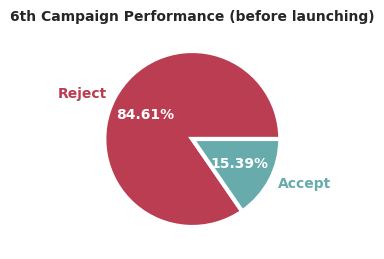

In [ ]:
# visualization
sns.set_style('whitegrid')
labels = ['Reject', 'Accept']
colors = ["#ba3d51", "#68abad"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(3, 3))

patches, texts, pcts = plt.pie(grp['Amount'], labels=labels, autopct='%.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 10})

# for each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('6th Campaign Performance (before launching)', fontsize=10, fontweight='bold')
plt.tight_layout()

* Only 15% of the customer sample accepted the offer in the 6th campaign before the launching



***Performance of the previous 5 campaigns***

In [ ]:
campaigns = pd.DataFrame(df.iloc[:,15:20].sum()).reset_index()
campaigns.columns = ['Campaign','Amount']
campaigns['%'] = round(campaigns['Amount']*100/sum(campaigns['Amount']),2)
campaigns = campaigns.sort_values(by='Campaign', ascending=True)
campaigns

,Campaign,Amount,%
3,AcceptedCmp1,133,21.77
4,AcceptedCmp2,26,4.26
0,AcceptedCmp3,151,24.71
1,AcceptedCmp4,155,25.37
2,AcceptedCmp5,146,23.90


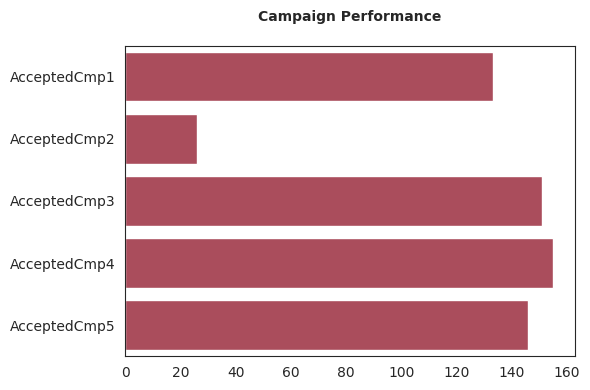

In [ ]:
# visualization
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.barplot(campaigns, y='Campaign', x= 'Amount')
plt.title('Campaign Performance\n', fontsize=10, fontweight='bold')
plt.xlabel('', fontsize=9)
plt.ylabel('', fontsize=9)
plt.tight_layout()

* It can be observed that Campaign 4 was the most successful among the other campaigns with 155 customers in the data sample accepting the offer
* The 2nd campaign was the campaign with the lowest conversion with only 26 customers accepting the offer

##### **Revenue by Products**

In [ ]:
rev = pd.DataFrame(df.iloc[:,4:10].sum()).reset_index()
rev.columns = ['Products','Revenue']
rev['%'] = round(rev['Revenue']*100/sum(rev['Revenue']),2)
rev = rev.sort_values(by='Revenue', ascending=False)
rev

,Products,Revenue,%
0,MntWines,619421,50.43
2,MntMeatProducts,335607,27.33
5,MntGoldProds,88766,7.23
3,MntFishProducts,75997,6.19
4,MntSweetProducts,55110,4.49
1,MntFruits,53283,4.34


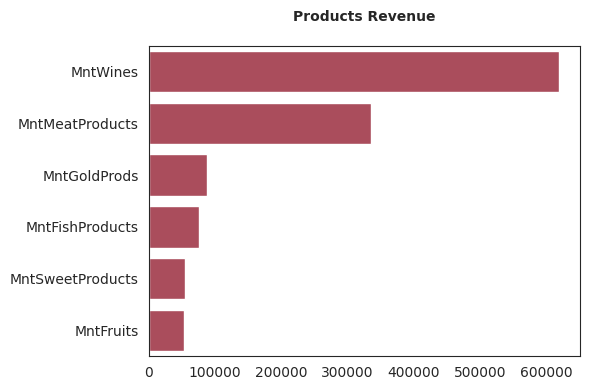

In [ ]:
# visualization
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.barplot(rev, y='Products', x= 'Revenue')
plt.title('Products Revenue\n', fontsize=10, fontweight='bold')
plt.xlabel('', fontsize=9)
plt.ylabel('', fontsize=9)
plt.tight_layout()

* The product that generates the highest revenue is wine with a contribution of 50% to the total revenue earned by the company

#### **Channel Performance**

In [ ]:
channel = pd.DataFrame(df.iloc[:,11:14].sum()).reset_index()
channel.columns = ['Channel','Amount']
channel['%'] = round(channel['Amount']*100/sum(channel['Amount']),2)
channel = channel.sort_values(by='Amount', ascending=False)
channel

,Channel,Amount,%
2,NumStorePurchases,11737,46.21
0,NumWebPurchases,8317,32.75
1,NumCatalogPurchases,5345,21.04


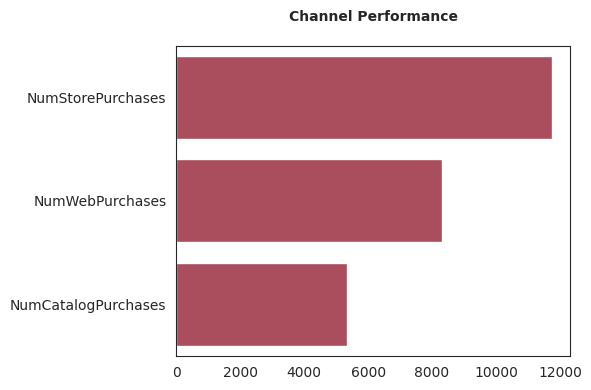

In [ ]:
# visualization
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.barplot(channel, y='Channel', x= 'Amount')
plt.title('Channel Performance\n', fontsize=10, fontweight='bold')
plt.xlabel('', fontsize=9)
plt.ylabel('', fontsize=9)
plt.tight_layout()

* Store is the channel with the most purchases with 46% of total orders coming from the store channel

#### **Total Dependent vs Total Amount Spent**

In [ ]:
grp = df.groupby('Dependents')['MntTotal'].sum().reset_index()
grp.columns = ['Total Dependents','Amount Spent']
grp

,Total Dependents,Amount Spent
0,0,598912
1,1,444416
2,2,85288
3,3,10802


<Figure size 600x400 with 0 Axes>

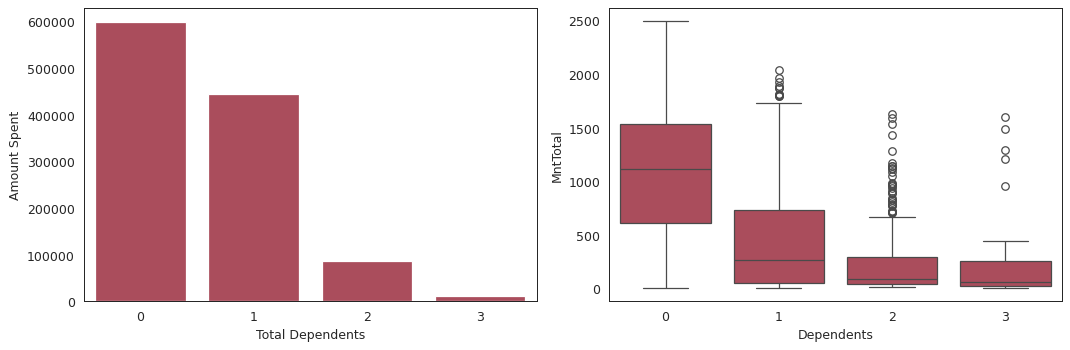

In [ ]:
# visualization
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grp, x='Total Dependents', y= 'Amount Spent', ax=ax1)
sns.boxplot(df, x='Dependents', y='MntTotal', ax=ax2)

plt.tight_layout()
plt.show()

* It can be observed that the total amount spent is higher in customers without dependents and gradually decreases as the number of dependents increases

In [ ]:
print("{} effect of variable on total amount spent : \n".format('Total dependent'))
print(df.groupby('Dependents')["MntTotal"].mean())

Total dependent effect of variable on total amount spent : 

Dependents
0    1056.282187
1     432.732230
2     223.267016
3     240.044444
Name: MntTotal, dtype: float64


* The average money spent by customers without dependents are R$1056

#### **Total Dependent vs Total Purchases**

In [ ]:
grp = df.groupby('Dependents')['TotalPurchases'].sum().reset_index()
grp.columns = ['Total Dependents','Total Purchases']
grp

,Total Dependents,Total Purchases
0,0,9408
1,1,12347
2,2,3312
3,3,332


<Figure size 600x400 with 0 Axes>

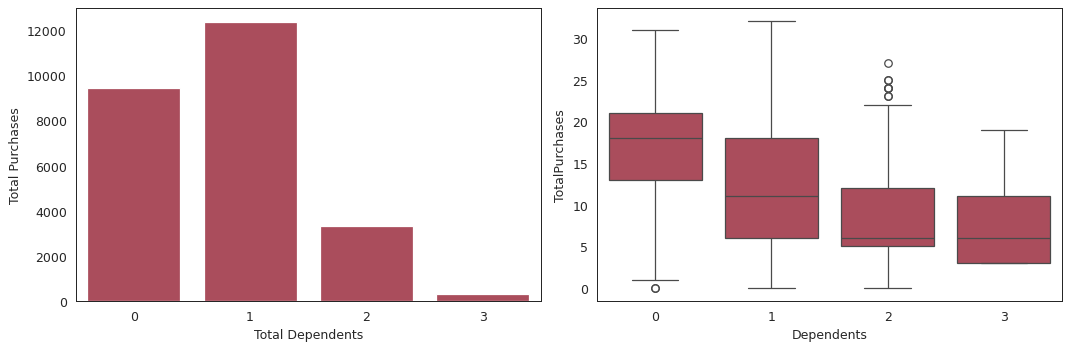

In [ ]:
# visualization
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grp, x='Total Dependents', y= 'Total Purchases', ax=ax1)
sns.boxplot(df, x='Dependents', y='TotalPurchases', ax=ax2)

plt.tight_layout()
plt.show()

* It can be observed that customers with one dependent generate the highest total purchases, followed by customers without dependents, and it gradually decreases as the number of dependents increases

In [ ]:
print("{} effect of variable on total purchases: \n".format('Total dependent'))
print(df.groupby('Dependents')['TotalPurchases'].mean())

Total dependent effect of variable on total purchases: 

Dependents
0    16.592593
1    12.022395
2     8.670157
3     7.377778
Name: TotalPurchases, dtype: float64


* If we look at average purchases, customers without dependents have the highest average purchases with 16 purchases

#### **Income vs Education**

In [ ]:
grp = df.groupby('Education')['Income'].sum().reset_index()
grp

,Education,Income
0,Bachelor,52933023.0
1,Doctoral,24133240.0
2,Master,17709635.0
3,Primary,975754.0
4,Secondary,8708298.0


<Figure size 600x400 with 0 Axes>

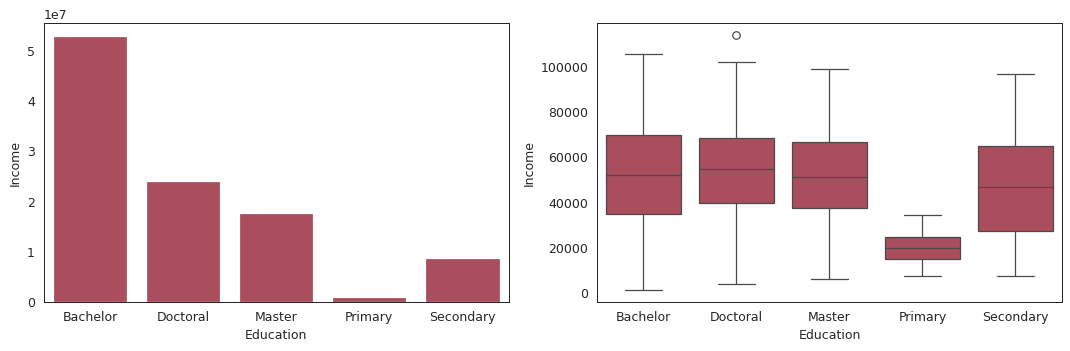

In [ ]:
# visualization
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grp, x='Education', y= 'Income', ax=ax1)
sns.boxplot(df, x='Education', y='Income', ax=ax2)

plt.tight_layout()
plt.show()

In [ ]:
print("{} effect of variable on income: \n".format('Education'))
print(df.groupby('Education')['Income'].mean())

Education effect of variable on income: 

Education
Bachelor     52150.761576
Doctoral     54973.211845
Master       52864.582090
Primary      19913.346939
Secondary    47586.327869
Name: Income, dtype: float64


* Customers who have a PhD have the highest average income with R$54973
* It can be seen that the higher the customer's education, the higher the average income

#### **Income vs Has Dependent**

In [ ]:
grp = df.groupby('Has_Dependent')['Income'].sum().reset_index()
grp.columns = ['Has Dependent','Income']
grp

,Has Dependent,Income
0,0,37226365.0
1,1,67233585.0


<Figure size 600x400 with 0 Axes>

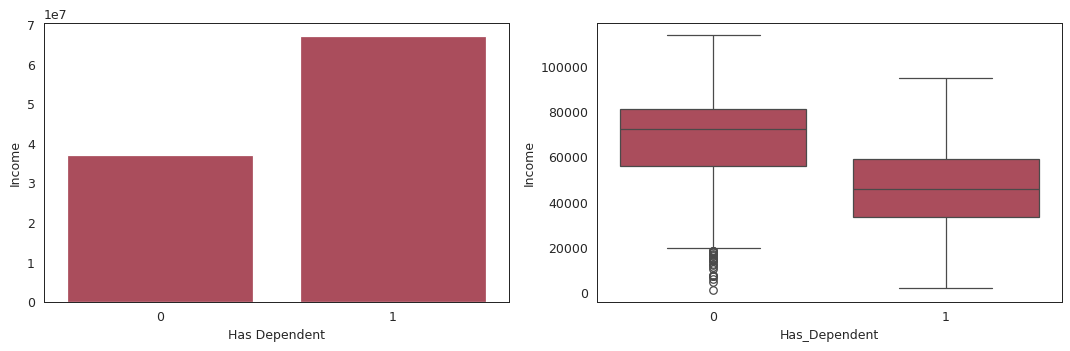

In [ ]:
# visualization
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grp, x='Has Dependent', y= 'Income', ax=ax1)
sns.boxplot(df, x='Has_Dependent', y='Income', ax=ax2)

plt.tight_layout()
plt.show()

In [ ]:
print("{} effect of variable on income: \n".format('Dependent status'))
print(df.groupby('Has_Dependent')['Income'].mean())

Dependent status effect of variable on income: 

Has_Dependent
0    65654.964727
1    46240.429849
Name: Income, dtype: float64


* Customers without dependents have the highest average income with R$65654

#### **Income vs Total Amount Spend**

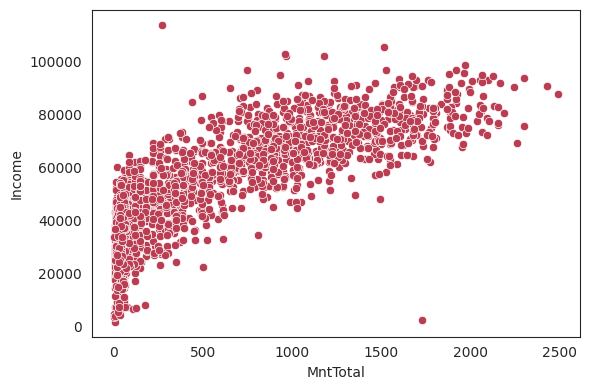

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.scatterplot(df, x='MntTotal', y='Income')
plt.tight_layout()
plt.show()

* The amount spent appears to be positively correlated with the customer's income

#### **Heatmap**

<Axes: >

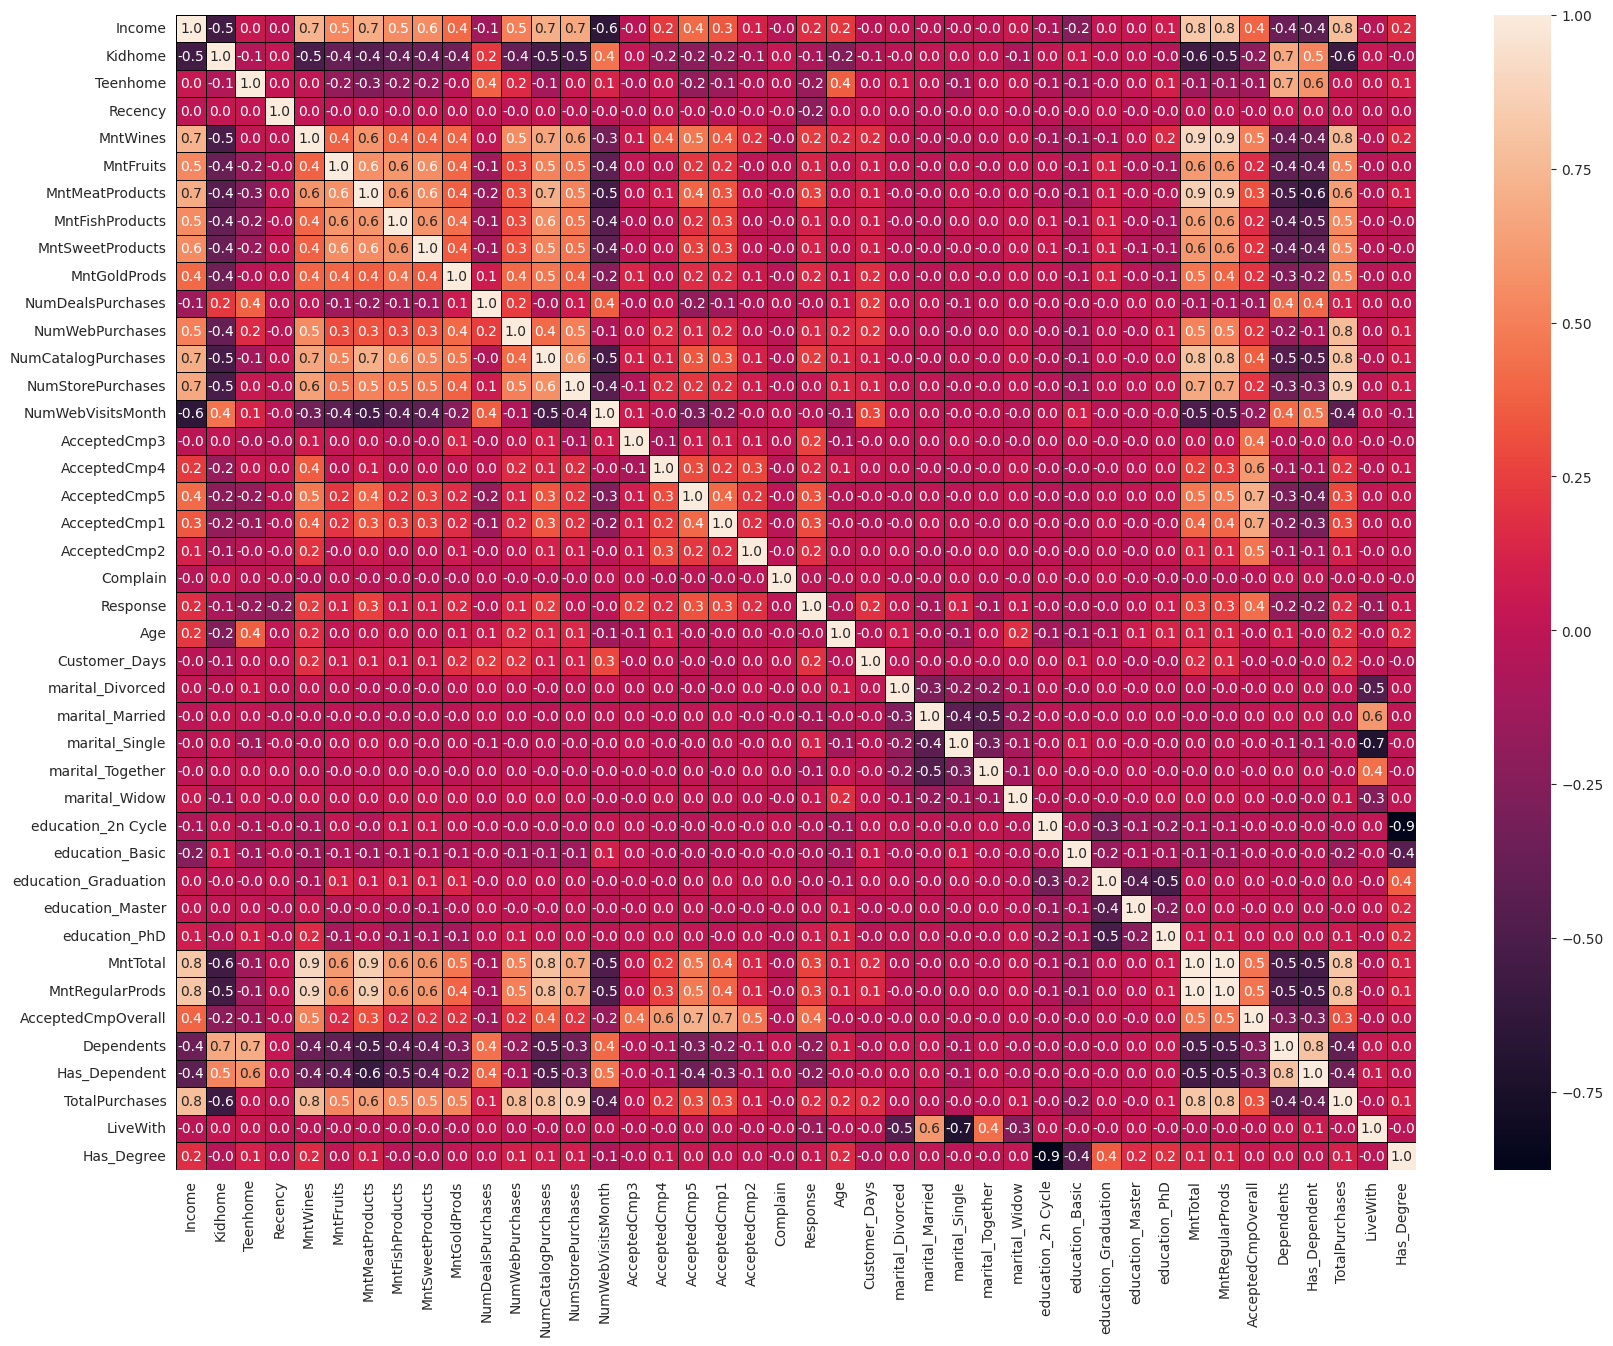

In [ ]:
plt.figure(figsize=(20,15))
sns.set_style('white')

sns.heatmap(df.corr(), annot=True, linecolor = "black", lw = 0.4, fmt= '.1f')

#### **Response vs Other Variable**

In [ ]:
colors = ["#ba3d51", "#68abad"]

def plot_var(col_name, full_name):

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,3), dpi=90)

    # histogram
    sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)

    # box-plot
    sns.boxplot(y=col_name, x='Response', data=df, ax=ax2, palette=colors, legend=False)
    ax2.set_ylabel('')
    ax2.set_title('Response by ' + full_name)

    plt.tight_layout()
    plt.show()

##### ***by customer's tenure***

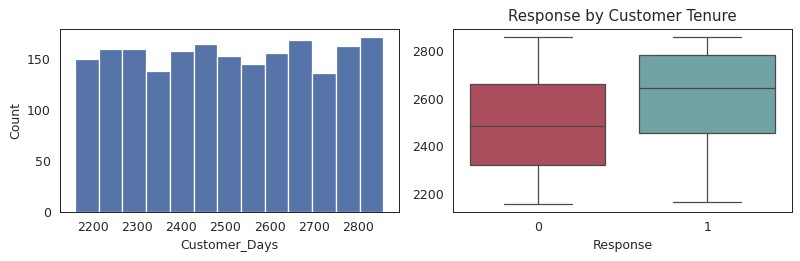

In [ ]:
plot_var('Customer_Days', 'Customer Tenure')

In [ ]:
df.groupby('Response')['Customer_Days'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,2495.166667,198.679888,2159.0,2321.0,2486.5,2661.0,2857.0
1,311.0,2602.041801,200.037500,2165.0,2456.0,2645.0,2780.5,2858.0


* Customers who have been customers for a long time are more likely to accept a campaign offer

##### ***by recency***

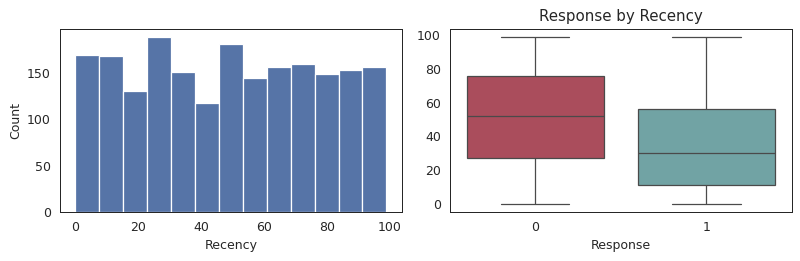

In [ ]:
plot_var('Recency', 'Recency')

In [ ]:
df.groupby('Response')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,51.398246,28.530273,0.0,27.0,52.0,76.0,99.0
1,311.0,35.038585,27.330801,0.0,11.0,30.0,56.0,99.0


* The average customer who accepted a campaign offer made a purchase 35 days ago
* Customers who have recently made a purchase are more likely to accept a campaign offer

##### ***by total purchases in the catalog channel***

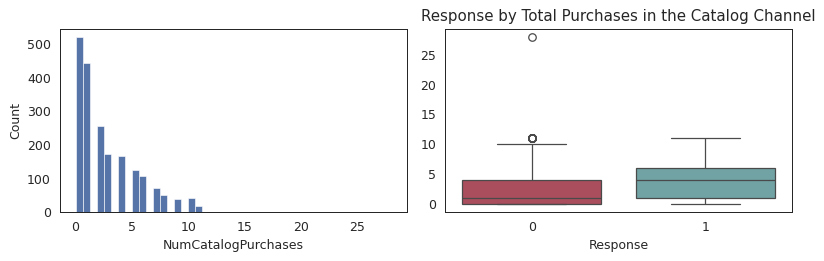

In [ ]:
plot_var('NumCatalogPurchases', 'Total Purchases in the Catalog Channel')

In [ ]:
df.groupby('Response')['NumCatalogPurchases'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,2.365497,2.641941,0.0,0.0,1.0,4.0,28.0
1,311.0,4.180064,3.127359,0.0,1.0,4.0,6.0,11.0


* The average customer who accepted a campaign offer made 4 purchases in the catalog channel
* Customers who make purchases in catalog channels are more likely to accept campaign offers

##### ***by total amount spent***

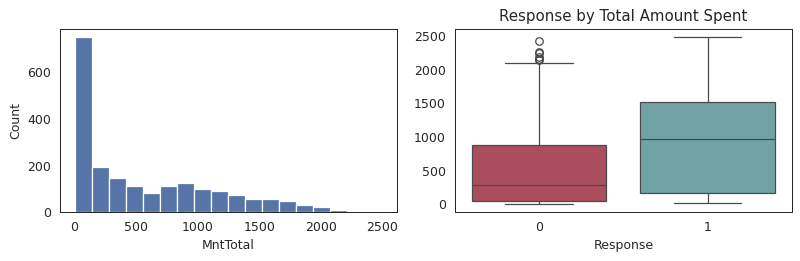

In [ ]:
plot_var('MntTotal', 'Total Amount Spent')

In [ ]:
df.groupby('Response')['MntTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,499.502339,527.283951,4.0,50.0,282.5,877.5,2429.0
1,311.0,917.263666,697.735333,14.0,170.0,964.0,1517.0,2491.0


* The average total money spent by customers who accepted the offer is R$917
* Customers who spend more money are more likely to accept campaign offers

##### ***by total amount spent on regular products***

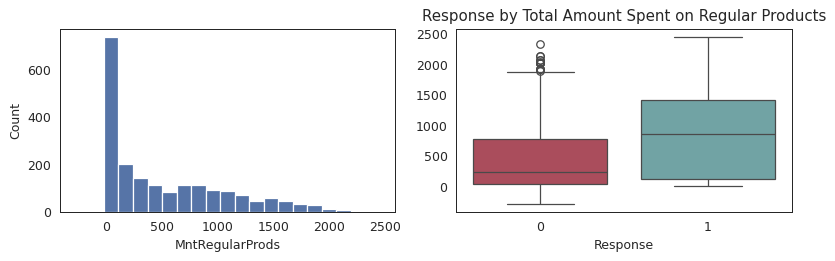

In [ ]:
plot_var('MntRegularProds', 'Total Amount Spent on Regular Products')

In [ ]:
df.groupby('Response')['MntRegularProds'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,458.983626,505.504396,-283.0,38.0,243.0,780.75,2333.0
1,311.0,854.630225,681.216380,3.0,132.5,858.0,1429.50,2458.0


* The average total money spent on regular products by customers who accepted the offer is R$854
* Customers who spend more money on regular products are more likely to accept campaign offers

##### ***by total amount spent on gold products***

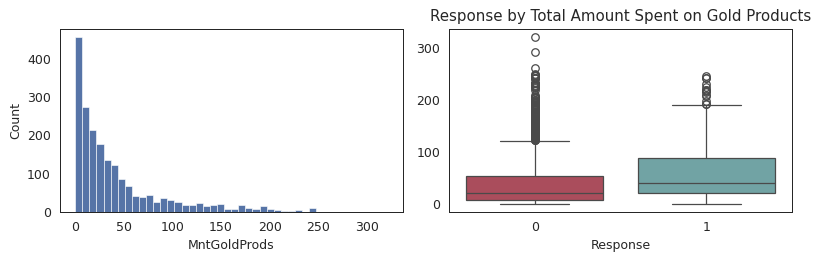

In [ ]:
plot_var('MntGoldProds', 'Total Amount Spent on Gold Products')

In [ ]:
df.groupby('Response')['MntGoldProds'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,40.518713,49.625177,0.0,7.0,21.0,52.75,321.0
1,311.0,62.633441,58.401066,0.0,20.0,40.0,88.50,245.0


* The average total money spent on gold products by customers who accepted the offer is R$62
* Customers who spend more money on gold products are more likely to accept campaign offers

##### ***by total amount spent on wine products***

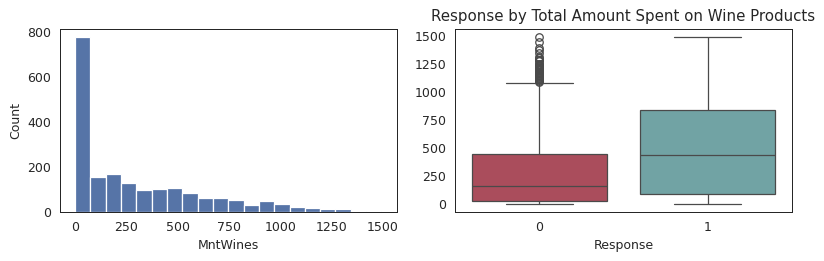

In [ ]:
plot_var('MntWines', 'Total Amount Spent on Wine Products')

In [ ]:
df.groupby('Response')['MntWines'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,272.361988,307.472981,0.0,22.0,158.0,447.75,1493.0
1,311.0,494.154341,423.958331,1.0,88.0,437.0,843.50,1492.0


* The average total money spent on wine products by customers who accepted the campaign offer is R$494
* Customers who spend more money on wine products are more likely to accept campaign offers

##### ***by total amount spent on meat products***

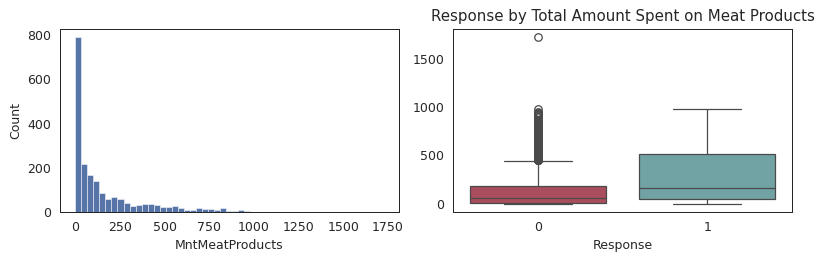

In [ ]:
plot_var('MntMeatProducts', 'Total Amount Spent on Meat Products')

In [ ]:
df.groupby('Response')['MntMeatProducts'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1710.0,142.533918,195.486519,0.0,14.0,57.0,187.5,1725.0
1,311.0,295.414791,290.672255,1.0,46.0,161.0,516.0,981.0


* The average total money spent on meat products by customers who accepted the campaign offer is R$295
* Customers who spend more money on meat products are more likely to accept campaign offers

## **Data Analysis**

##### **Feature Engineering**

###### **Encoding**

There are two type of encoding that will be used in this stage, namely:

1. **Ordinal** Encoding
    * The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
    * In ordinal encoding, each unique category value is assigned an integer value

2. **Non-Ordinal** Encoding
    * The categorical feature is nominal and do not have any order (like blue, red, purple)
    * In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1

* `Education` is ordinal features so ordinal encoding will be carried out
* `Marital` is a nominal feature, but since the feature is already encoded (non-ordinal), there is no need to do it again

In [ ]:
# drop these feature because these feature has been simplified into a new feature
df.drop(['education_2n Cycle', 'education_Basic', 'education_Graduation',
         'education_Master', 'education_PhD', 'marital_Married', 'marital_Together', 'marital_Widow',
          'marital_Single', 'marital_Divorced'], inplace=True, axis=1)

In [ ]:
# education feature
encoder = ce.OrdinalEncoder(cols=['Education'],return_df=True,
                           mapping=[{'col':'Education',
'mapping':{'Unknown':0,'Primary':1,'Secondary':2,'Bachelor':3,'Master':4,'Doctoral':5}}])

In [ ]:
df_encoded = encoder.fit_transform(df)

In [ ]:
# preview after encoded
df_encoded.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,Marital,LiveWith,Education,Has_Degree
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,1529,1441,0,0,0,22,Single,0,3,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,21,15,0,2,1,4,Single,0,3,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,734,692,0,0,0,20,Together,1,3,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,48,43,0,1,1,6,Together,1,3,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,407,392,0,1,1,14,Married,1,5,1


###### **Feature Scalling**

* Feature scaling is the process of normalizing the range of features in a dataset
* In this case, this step is important because the features have different ranges of values as features measured on different scales do not contribute equally to the analysis and might end up creating a bias

In [ ]:
# isolate the numerical variables
numerical_variables = [col for col in df_encoded.columns if df_encoded[col].dtype != "object"
                        and col not in "Response"]

# scale numerical variables using RobustScaler since it handles outliers better
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_encoded[numerical_variables] = scaler.fit_transform(df_encoded[numerical_variables])

df_encoded.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,Marital,LiveWith,Education,Has_Degree
0,0.204699,0.0,0.0,0.18,0.946170,2.580645,2.233645,3.404255,2.424242,1.340426,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1,0.722222,0.886040,1.304730,1.370987,0.0,-1.0,-1.0,0.833333,Single,-1.0,0.0,0.0
1,-0.154239,1.0,1.0,-0.22,-0.345756,-0.225806,-0.289720,-0.212766,-0.212121,-0.404255,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.888889,-0.680912,-0.354235,-0.324614,0.0,1.0,0.0,-0.666667,Single,-1.0,0.0,0.0
2,0.614797,0.0,0.0,-0.46,0.513458,1.322581,0.275701,2.106383,0.393939,0.361702,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0,0.277778,-0.113960,0.430143,0.480380,0.0,-1.0,-1.0,0.666667,Together,0.0,0.0,0.0
3,-0.753728,1.0,0.0,-0.46,-0.345756,-0.129032,-0.224299,-0.042553,-0.151515,-0.425532,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.777778,-0.606838,-0.324532,-0.291320,0.0,0.0,0.0,-0.500000,Together,0.0,0.0,0.0
4,0.209416,1.0,0.0,0.90,-0.010352,1.129032,0.233645,0.723404,0.575758,-0.212766,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.611111,-0.544160,0.070407,0.123662,0.0,0.0,0.0,0.166667,Married,0.0,2.0,0.0


#### **Customer Segmentation**

RFM analysis is a customer behavior segmentation technique. Based on customers’ historical transactions, RFM analysis focuses on 3 main aspects of customers’ transactions:

* **Recency**: How recently customers have made their purchases. In this case, the `Recency` feature will be used
* **Frequency**: How often customers have made their purchases. In this case, the `TotalPurchases` feature will be used
* **Monetary**: How much money customers spend on their purchases. In this case, the `MntTotal` feature will be used

In [ ]:
cols_rfm = ['Recency', 'TotalPurchases', 'MntTotal']

##### **Quartiles**

* The simplest way to create customers segments from RFM Model is to use quartiles
* Assign scores from 1 to 4 to Recency, Frequency and Monetary. One is the best/highest value, and four is the lowest/worst value

In [ ]:
df_rfm = df.copy()

In [ ]:
# quartiles of the three rfm features
quantiles = df_rfm[cols_rfm].quantile(q = [0.25,0.50,0.75])
quantiles

,Recency,TotalPurchases,MntTotal
0.25,24.0,6.0,55.0
0.50,49.0,12.0,343.0
0.75,74.0,18.0,964.0


In [ ]:
# creating functions to determine the RFM score
def R_score(data):
    if data <= quantiles['Recency'][0.25]:
        return 1
    elif data > quantiles['Recency'][0.25] and data <= quantiles['Recency'][0.5]:
        return 2
    elif data > quantiles['Recency'][0.5] and data <= quantiles['Recency'][0.75]:
        return 3
    else:
        return 4

def F_score(data):
    if data <= quantiles['TotalPurchases'][0.25]:
        return 4
    elif data > quantiles['TotalPurchases'][0.25] and data <= quantiles['TotalPurchases'][0.5]:
        return 3
    elif data > quantiles['TotalPurchases'][0.5] and data <= quantiles['TotalPurchases'][0.75]:
        return 2
    else:
        return 1


def M_score(data):
    if data <= quantiles['MntTotal'][0.25]:
        return 4
    elif data > quantiles['MntTotal'][0.25] and data <= quantiles['MntTotal'][0.5]:
        return 3
    elif data > quantiles['MntTotal'][0.5] and data <= quantiles['MntTotal'][0.75]:
        return 2
    else:
        return 1

In [ ]:
df_rfm['R_score'] = df_rfm['Recency'].apply(lambda x : R_score(x))
df_rfm['F_score'] = df_rfm['TotalPurchases'].apply(lambda x : F_score(x))
df_rfm['M_score'] = df_rfm['MntTotal'].apply(lambda x : M_score(x))
df_rfm['RFM_score'] = df_rfm['R_score'].map(str) + df_rfm['F_score'].map(str) + df_rfm['M_score'].map(str)

In [ ]:
df_rfm.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,Marital,LiveWith,Education,Has_Degree,R_score,F_score,M_score,RFM_score
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,1529,1441,0,0,0,22,Single,0,Bachelor,1,3,1,1,311
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,21,15,0,2,1,4,Single,0,Bachelor,1,2,4,4,244
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,734,692,0,0,0,20,Together,1,Bachelor,1,2,1,2,212
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,48,43,0,1,1,6,Together,1,Bachelor,1,2,4,4,244
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,407,392,0,1,1,14,Married,1,Doctoral,1,4,2,2,422


##### **K-Means**

* Another way to segment customers is to use unsupervised learning, namely the k-means algorithm
* In this case, the features used follow the RFM principle but with values that have been scaled
* It is recommended to bring all the features to the same scale for applying distance based algorithms like K-Means

In [ ]:
df_cluster = df_encoded.copy()

In [ ]:
# drop the categorical feature
df_cluster.drop(['Marital'], inplace=True, axis=1)

***Determine the Number of Clusters***

---



**1. Elbow Method**



The elbow method is a graphical representation of finding the optimal `K` in a k-means clustering

In [ ]:
X = df_cluster[cols_rfm]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=100, random_state=42).fit(X).inertia_
    inertia_list.append(inertia)

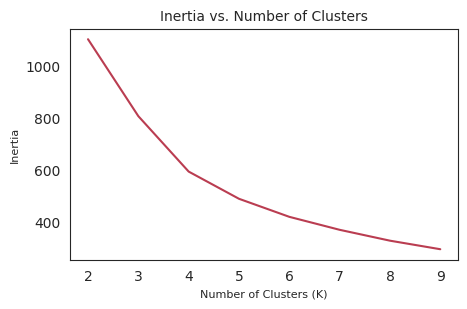

In [ ]:
# viz elbow method
plt.figure(figsize=[5,3])
plt.plot(range(2,10), inertia_list)
plt.title("Inertia vs. Number of Clusters", fontsize="10")
plt.xlabel("Number of Clusters (K)", fontsize="8")
plt.ylabel("Inertia", fontsize="8")
plt.show()

* There is no clear elbow inflection point to identify the right `K` using the elbow method

**2. Silhouette Score Method**


The silhouette score is a very useful method to find the number of `K` when the elbow method doesn’t show the elbow point

In [ ]:
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, init='k-means++', n_init=10, max_iter=100, random_state=42)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

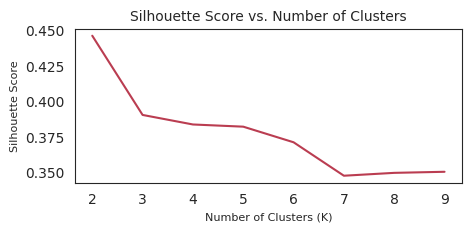

In [ ]:
# viz silhouette score
plt.figure(figsize=[5,2])
plt.plot(range(2,10), silhouette_list)
plt.title("Silhouette Score vs. Number of Clusters", fontsize="10")
plt.xlabel("Number of Clusters (K)", fontsize="8")
plt.ylabel("Silhouette Score", fontsize="8")
plt.show()

* The silhouette score is maximum(0.45) for K=2, but that’s not sufficient to select the optimal `K`

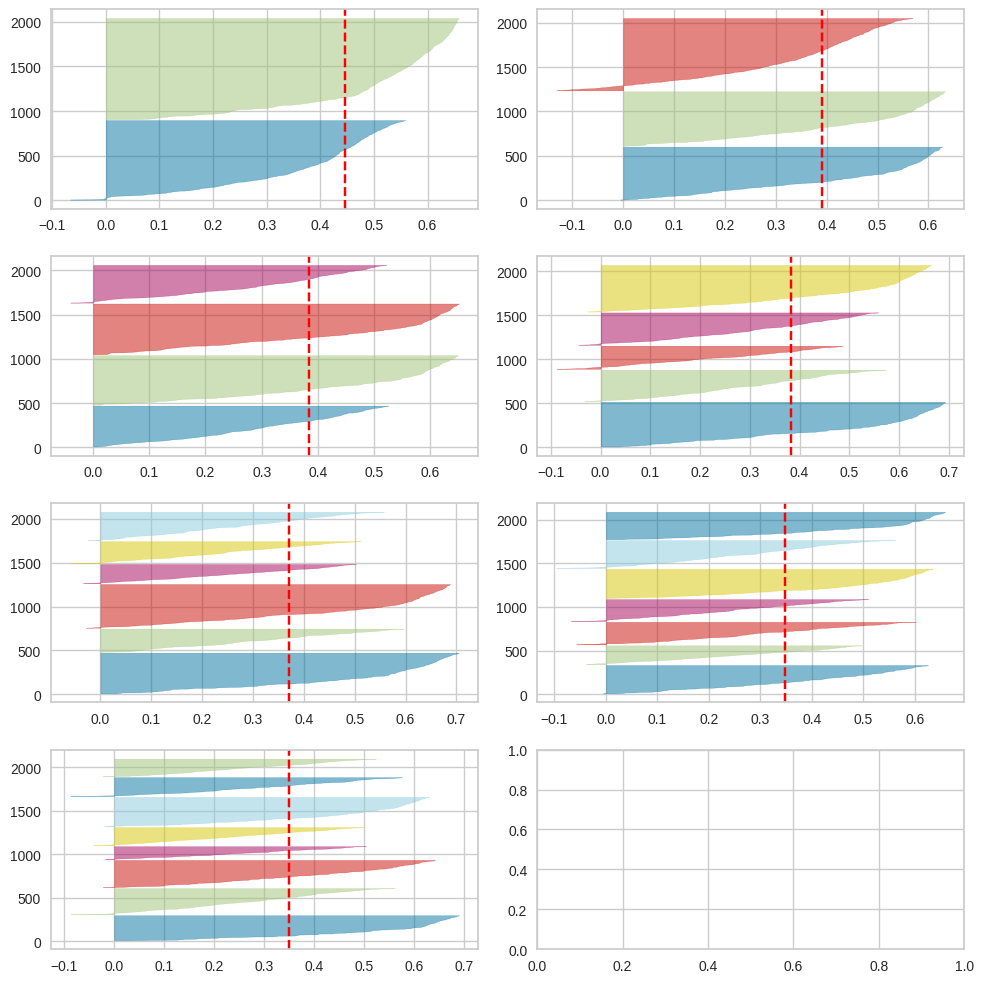

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(10,10))
for i in [2, 3, 4, 5, 6, 7, 8]:
    km = KMeans(n_clusters=i, n_init=10, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

plt.tight_layout()

The following conditions should be checked to pick the right `K` using the Silhouette plots:
* For a particular `K`, all the clusters should have a silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the silhouette score. All the clusters follow this condition.
* There shouldn’t be wide fluctuations in the size of the clusters. For K=2, the green cluster has almost twice the width as compared to the blue cluster. The cluster with K=[5,6,7,8] also eliminated because they don’t follow this condition.
* Clusters with K=3 and K=4 form clusters of uniform size, but K=4 is more uniform than K=3.

So, the silhouette plot approach gives us K=4 as the optimal value.

##### **Visualization**


In [ ]:
cluster = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=42)
cluster.fit(df_cluster[cols_rfm])
df_cluster['Cluster'] = cluster.predict(df_cluster[cols_rfm])

In [ ]:
df_rfm['Cluster'] = df_cluster.Cluster
df_rfm.groupby('Cluster').mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,LiveWith,Has_Degree,R_score,F_score,M_score
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69352.924242,0.090909,0.515152,73.261905,605.049784,49.101732,330.201299,71.948052,54.309524,72.623377,2.296537,5.867965,5.012987,8.413420,4.012987,0.067100,0.158009,0.155844,0.127706,0.025974,0.010823,0.155844,54.086580,2549.569264,1110.610390,1037.987013,0.534632,0.606061,0.512987,19.294372,0.619048,0.937229,3.424242,1.482684,1.439394
1,37421.789286,0.680357,0.516071,23.569643,76.725000,6.755357,33.169643,10.267857,6.312500,22.083929,2.289286,2.650000,0.803571,3.692857,6.335714,0.082143,0.023214,0.000000,0.005357,0.003571,0.012500,0.157143,49.117857,2484.266071,133.230357,111.146429,0.114286,1.196429,0.875000,7.146429,0.651786,0.855357,1.485714,3.435714,3.348214
2,37724.710297,0.736475,0.537522,73.347295,72.467714,7.291449,34.429319,10.169284,7.218150,21.420593,2.420593,2.636998,0.804538,3.682373,6.345550,0.057592,0.026178,0.001745,0.005236,0.000000,0.006981,0.043630,49.790576,2492.450262,131.575916,110.155323,0.090750,1.273997,0.897033,7.123909,0.649215,0.856894,3.455497,3.452007,3.322862
3,70062.061033,0.119718,0.457746,22.802817,599.525822,53.138498,339.791080,73.192488,52.460094,71.767606,2.298122,6.129108,4.971831,8.619718,4.119718,0.096244,0.126761,0.171362,0.159624,0.028169,0.007042,0.295775,52.309859,2532.173709,1118.107981,1046.340376,0.582160,0.577465,0.500000,19.720657,0.636150,0.906103,1.471831,1.441315,1.434272


In [ ]:
df_rfm.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,Marital,LiveWith,Education,Has_Degree,R_score,F_score,M_score,RFM_score,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,1529,1441,0,0,0,22,Single,0,Bachelor,1,3,1,1,311,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,21,15,0,2,1,4,Single,0,Bachelor,1,2,4,4,244,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,734,692,0,0,0,20,Together,1,Bachelor,1,2,1,2,212,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,48,43,0,1,1,6,Together,1,Bachelor,1,2,4,4,244,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,407,392,0,1,1,14,Married,1,Doctoral,1,4,2,2,422,2


###### **Distribution**

In [ ]:
grp = df_rfm.groupby('Cluster').size().reset_index()
grp.columns = ['Cluster', 'Count']
grp

,Cluster,Count
0,0,462
1,1,560
2,2,573
3,3,426


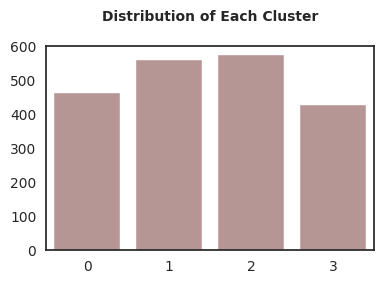

In [ ]:
plt.figure(figsize=(4,3))
sns.set_style('white')

sns.barplot(grp, x='Cluster', y='Count', color='#bc8f8f')
plt.title('Distribution of Each Cluster\n', fontsize=10, fontweight='bold')
plt.xlabel('', fontsize=9)
plt.ylabel('', fontsize=9)
plt.tight_layout()
plt.show()

###### **Recency**

In [ ]:
colors = ['#46edc8', '#FAEF7C', '#E26274', '#7b93c9']

def plot_cluster(col_name, full_name):

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,3), dpi=90)

    # bar plot
    sns.barplot(data=df_rfm, y=col_name, x='Cluster', ax=ax1, palette=colors)
    ax1.set_ylabel('')
    ax1.set_title('Cluster by ' + full_name)

    # box-plot
    sns.boxplot(y=col_name, x='Cluster', data=df_rfm, ax=ax2, palette=colors, legend=False)
    ax2.set_ylabel('')
    ax2.set_title('Cluster by ' + full_name)

    plt.tight_layout()
    plt.show()

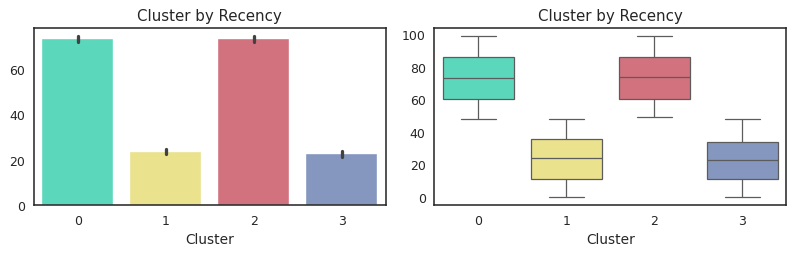

In [ ]:
plot_cluster('Recency', 'Recency')

In [ ]:
df_rfm.groupby('Cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,462.0,73.261905,14.692016,48.0,60.0,73.0,86.0,99.0
1,560.0,23.569643,14.270031,0.0,11.0,24.0,36.0,48.0
2,573.0,73.347295,15.036081,49.0,60.0,74.0,86.0,99.0
3,426.0,22.802817,14.084404,0.0,11.0,23.0,34.0,48.0


* **Cluster 0** and **Cluster 2** are customers who have not made a purchase for a long time with the last purchase being around 73 days ago
* **Cluster 1** and **Cluster 3** are customers who have recently made purchases with the last purchase being around 22 days ago

###### **Frequency**

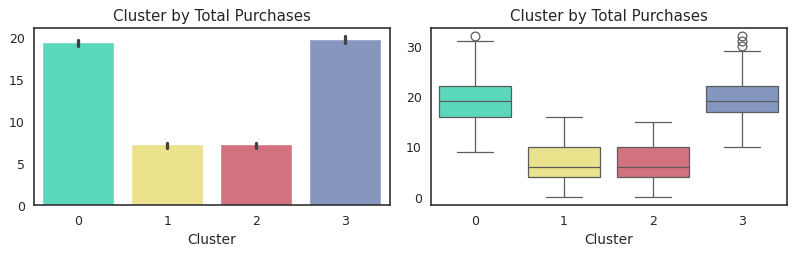

In [ ]:
plot_cluster('TotalPurchases', 'Total Purchases')

In [ ]:
df_rfm.groupby('Cluster')['TotalPurchases'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,462.0,19.294372,3.888346,9.0,16.0,19.0,22.0,32.0
1,560.0,7.146429,3.583902,0.0,4.0,6.0,10.0,16.0
2,573.0,7.123909,3.466171,0.0,4.0,6.0,10.0,15.0
3,426.0,19.720657,3.900455,10.0,17.0,19.0,22.0,32.0


* **Cluster 0** and **Cluster 3** are customers who buy frequently with an average of 19 purchases
* **Cluster 1** and **Cluster 2** are customers who buy frequently with an average of 7 purchases

###### **Monetary**

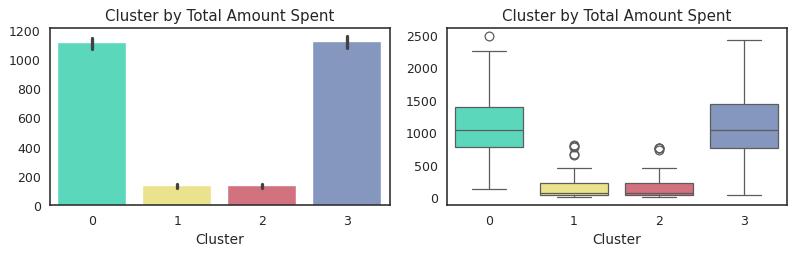

In [ ]:
plot_cluster('MntTotal', 'Total Amount Spent')

In [ ]:
df_rfm.groupby('Cluster')['MntTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,462.0,1110.610390,428.217386,125.0,780.25,1040.0,1396.00,2491.0
1,560.0,133.230357,139.727074,5.0,34.00,63.0,219.25,803.0
2,573.0,131.575916,134.086236,4.0,37.00,64.0,219.00,770.0
3,426.0,1118.107981,450.795686,38.0,763.25,1044.0,1444.75,2429.0


* **Cluster 0** and **Cluster 3** are customers who spend more money with the average total money they spend around 1110
* **Cluster 1** and **Cluster 2** are customers who spend less money with the average total money they spend around 130

###### **Monetary and Frequency**

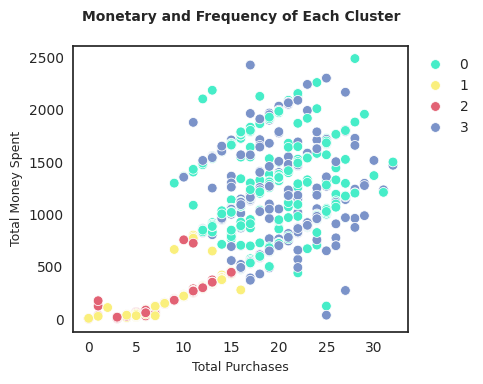

In [ ]:
plt.figure(figsize=(5,4))
sns.set_style('white')

sns.scatterplot(df_rfm, x='TotalPurchases', y='MntTotal', hue = 'Cluster', palette=colors)
plt.title('Monetary and Frequency of Each Cluster\n', fontsize=10, fontweight='bold')
plt.xlabel('Total Purchases', fontsize=9)
plt.ylabel('Total Money Spent', fontsize=9)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

* **Cluster 1** and **Cluster 2** are customers who have a total number of purchases below 16 purchases, with a total money spend of no more than 800
* **Cluster 0** and **Cluster 3** are customers who have a total number of purchases above 9 purchases, with a total money spend around 30-3000

###### **Monetary and Recency**

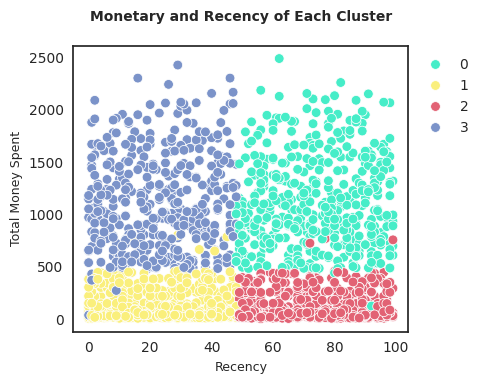

In [ ]:
plt.figure(figsize=(5,4))
sns.set_style('white')

sns.scatterplot(df_rfm, y='MntTotal', x='Recency', hue = 'Cluster', palette=colors)
plt.title('Monetary and Recency of Each Cluster\n', fontsize=10, fontweight='bold')
plt.xlabel('Recency', fontsize=9)
plt.ylabel('Total Money Spent', fontsize=9)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

* **Cluster 0** are customers who have not made a purchase for a long time, the last purchase was around 48-99 days ago, with an average amount of money spent above 500
* **Cluster 1** are are customers who made a purchase about 0-48 days ago, with an average amount of money spent under 500
* **Cluster 2** are customers who have not made a purchase for a long time, the last purchase was around 49-99 days ago, with an average amount of money spent below 500
* **Cluster 3** are are customers who made a purchase about 0-48 days ago, with an average amount of money spent above 500

###### **Frequency and Recency**

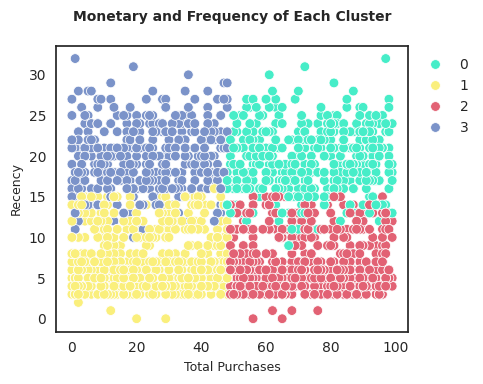

In [ ]:
plt.figure(figsize=(5,4))
sns.set_style('white')

sns.scatterplot(df_rfm, y='TotalPurchases', x='Recency', hue = 'Cluster', palette=colors)
plt.title('Monetary and Frequency of Each Cluster\n', fontsize=10, fontweight='bold')
plt.ylabel('Recency', fontsize=9)
plt.xlabel('Total Purchases', fontsize=9)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

* **Cluster 0** are customers who have not made a purchase for a long time, the last purchase was around 48-99 days ago, with an average total purchase of more than 15 purchases
* **Cluster 1** are customers who made a purchase about 0-48 days ago, with an average total purchase of under 15 purchases
* **Cluster 2** are customers who have not made a purchase for a long time, the last purchase was around 49-99 days ago, with an average total purchase of under 15 purchases
* **Cluster 3** are customers who made a purchase about 0-48 days ago, with an average total purchase of more than 15 purchases

###### **Customer's Income**

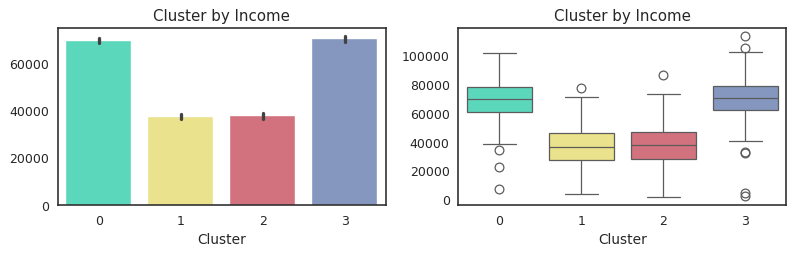

In [ ]:
plot_cluster('Income', 'Income')

In [ ]:
df_rfm.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,462.0,69352.924242,12201.304595,7144.0,61093.00,70077.0,78119.25,102160.0
1,560.0,37421.789286,13573.938954,4023.0,27585.75,36864.5,46630.50,77882.0
2,573.0,37724.710297,13718.933653,1730.0,27943.00,37760.0,47009.00,86580.0
3,426.0,70062.061033,13166.635060,2447.0,62092.50,70304.0,78946.75,113734.0


* **Cluster 0** and **Cluster 3** are customers who have high salaries with an average income of around 70000
* **Cluster 1** and **Cluster 2** are customers who have low salaries with an average income of around 37000

###### **Num Dependents**

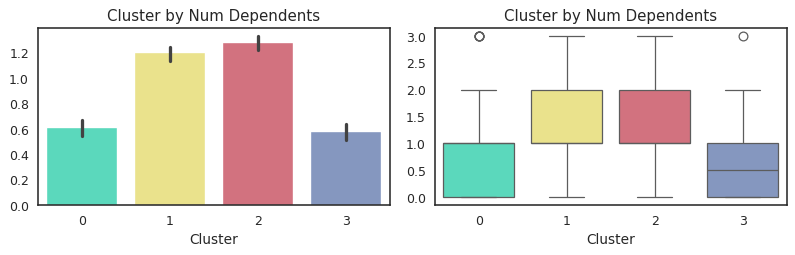

In [ ]:
plot_cluster('Dependents', 'Num Dependents')

In [ ]:
df_rfm.groupby('Cluster')['Dependents'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,462.0,0.606061,0.665713,0.0,0.0,1.0,1.0,3.0
1,560.0,1.196429,0.685125,0.0,1.0,1.0,2.0,3.0
2,573.0,1.273997,0.697125,0.0,1.0,1.0,2.0,3.0
3,426.0,0.577465,0.636061,0.0,0.0,0.5,1.0,3.0


* **Cluster 0** and **Cluster 3** are customers who do not have dependents
* **Cluster 1** and **Cluster 2** are customers who have an average of 1 dependent

###### **Product Preferences**

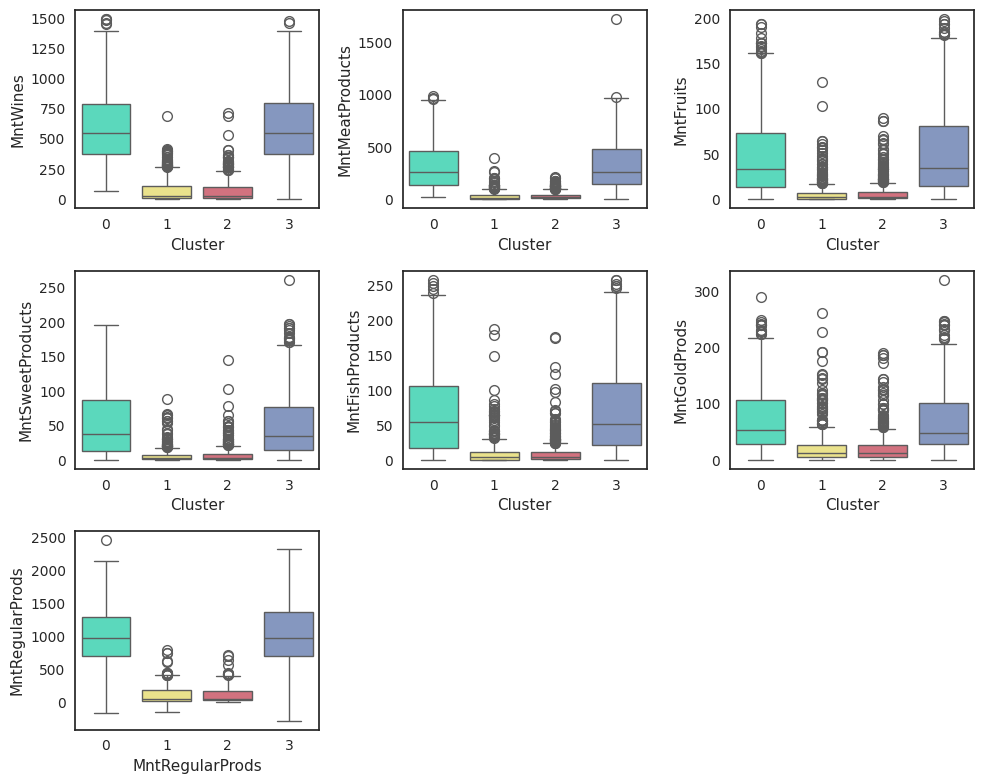

In [ ]:
cols_prod = ['MntWines', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
             'MntFishProducts', 'MntGoldProds', 'MntRegularProds']

# visualization
fig = plt.figure(figsize=(10,8))

for i in range(0, len(cols_prod)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df_rfm[cols_prod[i]], x=df_rfm['Cluster'], palette=colors)
plt.xlabel(cols_prod[i])
plt.tight_layout()
plt.show()

In [ ]:
df_rfm.groupby('Cluster')[cols_prod].mean()

,MntWines,MntMeatProducts,MntFruits,MntSweetProducts,MntFishProducts,MntGoldProds,MntRegularProds
Cluster,,,,,,,
0,605.049784,330.201299,49.101732,54.309524,71.948052,72.623377,1037.987013
1,76.725000,33.169643,6.755357,6.312500,10.267857,22.083929,111.146429
2,72.467714,34.429319,7.291449,7.218150,10.169284,21.420593,110.155323
3,599.525822,339.791080,53.138498,52.460094,73.192488,71.767606,1046.340376


* **Clusters 0** and **Cluster 3** are customers who have a high purchasing frequency in all product categories
* On the other hand, **Clusters 1** and **Cluster 2** have low purchasing frequencies for each product category

###### **Channel Performance**

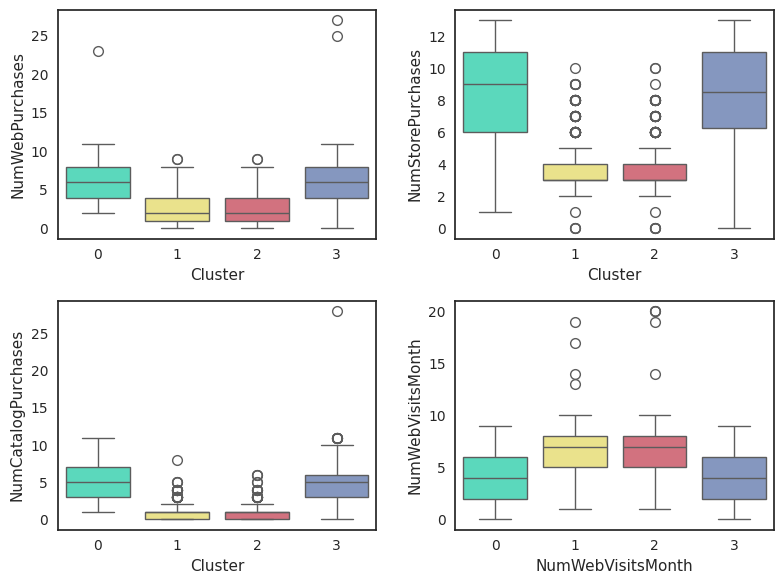

In [ ]:
cols_channel = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',
             'NumWebVisitsMonth']

# visualization
fig = plt.figure(figsize=(8,6))

for i in range(0, len(cols_channel)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df_rfm[cols_channel[i]], x=df_rfm['Cluster'], palette=colors)
plt.xlabel(cols_channel[i])
plt.tight_layout()
plt.show()

In [ ]:
df_rfm.groupby('Cluster')[cols_channel].mean()

,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumWebVisitsMonth
Cluster,,,,
0,5.867965,8.413420,5.012987,4.012987
1,2.650000,3.692857,0.803571,6.335714
2,2.636998,3.682373,0.804538,6.345550
3,6.129108,8.619718,4.971831,4.119718


* **Clusters 0** and **Cluster 3** have a high purchase frequency on each channel. On the other hand, cluster 1 and 2 have low purchase frequency on each channel
* **Cluster 1** and **Cluster 2** are customers who make the fewest purchases across all channels but have a higher number of web visits than other clusters. Based on this it can be observed that:
  - Cluster that have a higher frequency of purchases and higher total monet spent tend to rarely visit product web channels. This may be because customer's already know the company;s products well and they don't need a long time to decide to buy the product they want.
  - Cluster that have a lower frequency of purchases and lower total monet spent tend to often visit product web channels. This may be because customers are still hesitant to buy the company's products. This can happen if the customer is still considering purchasing a product from IFood or from other company by comparing their prices, delivery cost, etc.

##### **Cluster Characteristics**

From the visualization above, it can be concluded that:

> **Cluster 0**: <font color='rosybrown'>***Can't Lose Them***</font>
* Customers who have made frequent, high-value purchases in the past but haven't purchased recently. These customers are regular users of the company at risk of switching. The company can't lose them to the competitor because they are high value customers

> **Cluster 1**: <font color='rosybrown'>***Rookies***</font>
* Customers who bought most recently but only made small purchases. These customers may have just started using iFood's products

> **Cluster 2**: <font color='rosybrown'>***Hibernating***</font>
* Customers who previously made small and infrequent purchases but have not purchased anything in a long time. These customers are on the verge of becoming lost customers. Some of these customers may have stopped using iFood's products altogether and decided to use alternative products

> **Cluster 3**: <font color='rosybrown'>***Champions***</font>
* Customers who purchased recently, order often and spend the most. These customers are iFood’s most valuable customers

In [ ]:
def get_segments(row):
    if row['Cluster'] == 0:
        return 'Cant Lose Them'
    elif row['Cluster'] == 1:
        return 'Rookies'
    elif row['Cluster'] == 2:
        return 'Hibernating'
    elif row['Cluster'] == 3:
        return 'Champions'
    else:
        return 'Unknown'

df_rfm['Segments'] = df_rfm.apply(get_segments, axis=1)

In [ ]:
df_rfm.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,Marital,LiveWith,Education,Has_Degree,R_score,F_score,M_score,RFM_score,Cluster,Segments
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,1529,1441,0,0,0,22,Single,0,Bachelor,1,3,1,1,311,0,Cant Lose Them
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,21,15,0,2,1,4,Single,0,Bachelor,1,2,4,4,244,1,Rookies
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,734,692,0,0,0,20,Together,1,Bachelor,1,2,1,2,212,3,Champions
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,48,43,0,1,1,6,Together,1,Bachelor,1,2,4,4,244,1,Rookies
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,407,392,0,1,1,14,Married,1,Doctoral,1,4,2,2,422,2,Hibernating


In [ ]:
# save dataframe as CSV
df_rfm.to_csv("all data.csv")

In [ ]:
grp = df_rfm.groupby('Segments').size().reset_index()
grp.columns = ['Segments', 'Count']
grp['%'] = round(grp['Count']*100/sum(grp['Count']),2)
grp

,Segments,Count,%
0,Cant Lose Them,462,22.86
1,Champions,426,21.08
2,Hibernating,573,28.35
3,Rookies,560,27.71


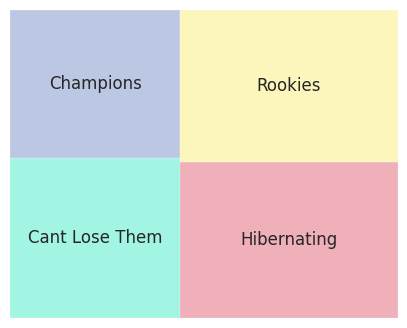

In [ ]:
# generate treemap
fig, ax = plt.subplots(1, figsize = (5,4))

squarify.plot(sizes=grp['Count'],
              label=grp['Segments'],
              alpha=.5,
              color=['#46edc8', '#7b93c9', '#E26274', '#FAEF7C']
             )
plt.axis('off')
plt.show()

#### **Customer's Response Prediction**

###### **Handle Imbalanced Target Feature**

* The target feature, 6th campaign response, is highly imbalanced, with 15% accepting the offer and 85% rejecting the offer. That's why it requires resampling.
* When applying machine learning algorithms with imbalanced data, the model obtained will be more biased towards the majority classes. This means that the model will predict the majority class, not the minority class.

In [ ]:
df_encoded.drop(['Marital'], axis=1, inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE

# resampling the minority class
sm = SMOTE(sampling_strategy='minority', random_state=42)

# fit the model to generate the data
X_balanced, y_balanced = sm.fit_resample(df_encoded.drop('Response', axis=1), df_encoded['Response'])

df_balanced = pd.concat([pd.DataFrame(y_balanced), pd.DataFrame(X_balanced)], axis=1)

In [ ]:
df_balanced.head()

,Response,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,LiveWith,Education,Has_Degree
0,1,0.204699,0.0,0.0,0.18,0.946170,2.580645,2.233645,3.404255,2.424242,1.340426,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.722222,0.886040,1.304730,1.370987,0.0,-1.0,-1.0,0.833333,-1.0,0.0,0.0
1,0,-0.154239,1.0,1.0,-0.22,-0.345756,-0.225806,-0.289720,-0.212766,-0.212121,-0.404255,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.888889,-0.680912,-0.354235,-0.324614,0.0,1.0,0.0,-0.666667,-1.0,0.0,0.0
2,0,0.614797,0.0,0.0,-0.46,0.513458,1.322581,0.275701,2.106383,0.393939,0.361702,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,-0.113960,0.430143,0.480380,0.0,-1.0,-1.0,0.666667,0.0,0.0,0.0
3,0,-0.753728,1.0,0.0,-0.46,-0.345756,-0.129032,-0.224299,-0.042553,-0.151515,-0.425532,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-0.777778,-0.606838,-0.324532,-0.291320,0.0,0.0,0.0,-0.500000,0.0,0.0,0.0
4,0,0.209416,1.0,0.0,0.90,-0.010352,1.129032,0.233645,0.723404,0.575758,-0.212766,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,-0.611111,-0.544160,0.070407,0.123662,0.0,0.0,0.0,0.166667,0.0,2.0,0.0


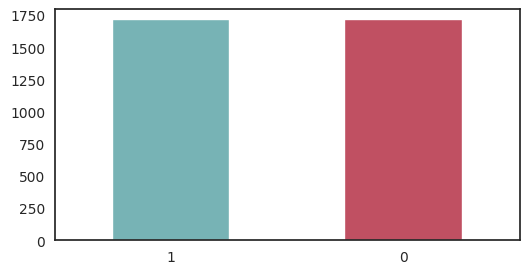

In [ ]:
fig = plt.figure(figsize = (6,3))
df_balanced['Response'].value_counts(normalize=False).plot(kind='bar', color= ['#68abad', '#ba3d51'], alpha = 0.9, rot=0)
plt.show()

###### **Feature Selection**

At this stage, features that cannot help predict customer response to the campaign will be discarded

In [ ]:
# pearson correlation
df_balanced.corr()['Response'].reset_index(name='corr value').sort_values(by='corr value', ascending=False)

,index,corr value
0,Response,1.000000
26,AcceptedCmpOverall,0.427074
18,AcceptedCmp5,0.331661
24,MntTotal,0.327750
25,MntRegularProds,0.322484
7,MntMeatProducts,0.308328
13,NumCatalogPurchases,0.307008
5,MntWines,0.299489
19,AcceptedCmp1,0.296991
23,Customer_Days,0.281475


Because the correlation value is small, the features that will be used are features that have a correlation value > 0.1. Therefore, the features to be used are:

 * `Response` and `	AcceptedCmpOverall` have a positive moderate relationship
 * `Response` and `AcceptedCmp5`, `AcceptedCmp1`, `MntTotal`, `MntRegularProds`, `MntMeatProducts`, `AcceptedCmp2`, `MntWines`, `NumCatalogPurchases`, `Customer_Days`, `AcceptedCmp2`, `Income`, `AcceptedCmp4`, `TotalPurchases`, `MntGoldProds`, `NumWebPurchases`, `MntFruits`, `MntSweetProducts`, `MntFishProducts`, `Education` have a positive weak relationship
 * `Response` and `LiveWith`, `Kidhome`, `Teenhome`, `Dependents`, `Recency`, `Has_Dependent` have a negative weak relationship

In [ ]:
# drop unnecessary feature
df_model = df_balanced.copy()
df_model.drop(['Complain', 'NumDealsPurchases', 'Age', 'Has_Degree',
               'AcceptedCmp2', 'AcceptedCmp4'], inplace=True, axis=1)

# preview
df_model.head(5)

,Response,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Has_Dependent,TotalPurchases,LiveWith,Education
0,1,0.204699,0.0,0.0,0.18,0.946170,2.580645,2.233645,3.404255,2.424242,1.340426,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.886040,1.304730,1.370987,0.0,-1.0,-1.0,0.833333,-1.0,0.0
1,0,-0.154239,1.0,1.0,-0.22,-0.345756,-0.225806,-0.289720,-0.212766,-0.212121,-0.404255,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,-0.680912,-0.354235,-0.324614,0.0,1.0,0.0,-0.666667,-1.0,0.0
2,0,0.614797,0.0,0.0,-0.46,0.513458,1.322581,0.275701,2.106383,0.393939,0.361702,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,-0.113960,0.430143,0.480380,0.0,-1.0,-1.0,0.666667,0.0,0.0
3,0,-0.753728,1.0,0.0,-0.46,-0.345756,-0.129032,-0.224299,-0.042553,-0.151515,-0.425532,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,-0.606838,-0.324532,-0.291320,0.0,0.0,0.0,-0.500000,0.0,0.0
4,0,0.209416,1.0,0.0,0.90,-0.010352,1.129032,0.233645,0.723404,0.575758,-0.212766,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,-0.544160,0.070407,0.123662,0.0,0.0,0.0,0.166667,0.0,2.0


##### **Model Building**

In [ ]:
# define X and y
X = df_model.drop('Response', axis=1)
y = df_model['Response']

In [ ]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(2565, 26) (855, 26)


The following are several algorithms that will be tested to determine the best model for predicting customer response to the next campaign:

* Logistic Regression
* Decision Tree
* Random Forest
* K-Nearest Neighbor
* Gaussian Naive Bayes
* XGBoost

###### **Logistic Regression**

In [ ]:
log_model = LogisticRegression().fit(X_train, y_train)

***Training Model***


---



In [ ]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression)\n')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1278
           1       0.84      0.86      0.85      1287

    accuracy                           0.85      2565
   macro avg       0.85      0.85      0.85      2565
weighted avg       0.85      0.85      0.85      2565



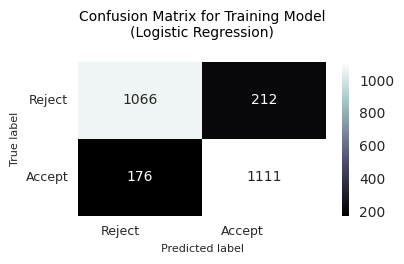

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 10}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
log_accuracy_train = accuracy_score(y_train, y_train_pred_log)
log_precision_train = precision_score(y_train, y_train_pred_log)
log_recall_train = recall_score(y_train, y_train_pred_log)
log_f1_train = f1_score(y_train, y_train_pred_log)

print("Accuracy: %.2f%%" % (log_accuracy_train * 100.0))
print("Precision: %.2f%%" % (log_precision_train * 100.0))
print("Recall: %.2f%%" % (log_recall_train * 100.0))
print("F1 Score: %.2f%%" % (log_f1_train * 100.0))

Accuracy: 84.87%
Precision: 83.98%
Recall: 86.32%
F1 Score: 85.13%


***Testing Model***


---



In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression)\n')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       432
           1       0.84      0.90      0.87       423

    accuracy                           0.86       855
   macro avg       0.86      0.86      0.86       855
weighted avg       0.86      0.86      0.86       855



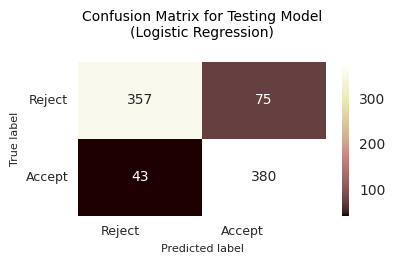

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 10}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
log_accuracy_test = accuracy_score(y_test, y_test_pred_log)
log_precision_test = precision_score(y_test, y_test_pred_log)
log_recall_test = recall_score(y_test, y_test_pred_log)
log_f1_test = f1_score(y_test, y_test_pred_log)

print("Accuracy: %.2f%%" % (log_accuracy_test * 100.0))
print("Precision: %.2f%%" % (log_precision_test * 100.0))
print("Recall: %.2f%%" % (log_recall_test * 100.0))
print("F1 Score: %.2f%%" % (log_f1_test * 100.0))

Accuracy: 86.20%
Precision: 83.52%
Recall: 89.83%
F1 Score: 86.56%


> **Logistic Regression Model Performance**
* The model has an accuracy value in training and testing models > 0.8. This value is considered a good score
* The training model has higher accuracy than the testing model by a difference of around 0.02

###### **Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

***Training Model***


---



In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Testing Model (Decision Tree)\n')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Testing Model (Decision Tree)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1278
           1       1.00      0.99      0.99      1287

    accuracy                           0.99      2565
   macro avg       0.99      0.99      0.99      2565
weighted avg       0.99      0.99      0.99      2565



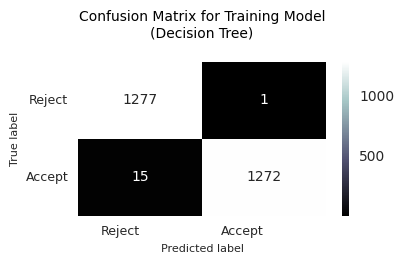

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 10}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
dt_accuracy_train = accuracy_score(y_train, y_train_pred_dt)
dt_precision_train = precision_score(y_train, y_train_pred_dt)
dt_recall_train = recall_score(y_train, y_train_pred_dt)
dt_f1_train = f1_score(y_train, y_train_pred_dt)

print("Accuracy: %.2f%%" % (dt_accuracy_train * 100.0))
print("Precision: %.2f%%" % (dt_precision_train * 100.0))
print("Recall: %.2f%%" % (dt_recall_train * 100.0))
print("F1 Score: %.2f%%" % (dt_f1_train * 100.0))

Accuracy: 99.38%
Precision: 99.92%
Recall: 98.83%
F1 Score: 99.37%


***Testing Model***

---



In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree)\n:')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree)
:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       432
           1       0.87      0.88      0.87       423

    accuracy                           0.87       855
   macro avg       0.87      0.87      0.87       855
weighted avg       0.87      0.87      0.87       855



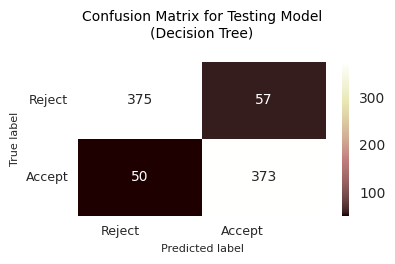

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 10}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
dt_accuracy_test = accuracy_score(y_test, y_test_pred_dt)
dt_precision_test = precision_score(y_test, y_test_pred_dt)
dt_recall_test = recall_score(y_test, y_test_pred_dt)
dt_f1_test = f1_score(y_test, y_test_pred_dt)

print("Accuracy: %.2f%%" % (dt_accuracy_test * 100.0))
print("Precision: %.2f%%" % (dt_precision_test * 100.0))
print("Recall: %.2f%%" % (dt_recall_test * 100.0))
print("F1 Score: %.2f%%" % (dt_f1_test * 100.0))

Accuracy: 87.49%
Precision: 86.74%
Recall: 88.18%
F1 Score: 87.46%


> **Decision Tree Model Performance**
* The training model has an accuracy value close to 1, and testing models > 0.8
* It can be observed that the model is overfitting, i.e it performs well on the training data, but generalizes poorly on the testing data

###### **Random Forest**

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

***Training Model***

---



In [ ]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Testing Model (Random Forest)\n')
print(classification_report(y_train, y_train_pred_rf))

Classification Report Testing Model (Random Forest)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1278
           1       0.99      0.99      0.99      1287

    accuracy                           0.99      2565
   macro avg       0.99      0.99      0.99      2565
weighted avg       0.99      0.99      0.99      2565



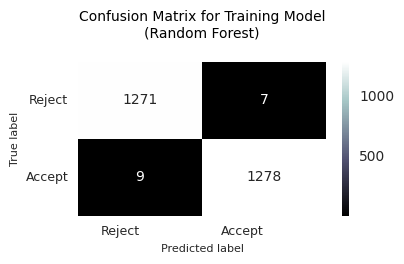

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 10}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
rf_accuracy_train = accuracy_score(y_train, y_train_pred_rf)
rf_precision_train = precision_score(y_train, y_train_pred_rf)
rf_recall_train = recall_score(y_train, y_train_pred_rf)
rf_f1_train = f1_score(y_train, y_train_pred_rf)

print("Accuracy: %.2f%%" % (rf_accuracy_train * 100.0))
print("Precision: %.2f%%" % (rf_precision_train * 100.0))
print("Recall: %.2f%%" % (rf_recall_train * 100.0))
print("F1 Score: %.2f%%" % (rf_f1_train * 100.0))

Accuracy: 99.38%
Precision: 99.46%
Recall: 99.30%
F1 Score: 99.38%


***Testing Model***

---



In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest)\n:')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest)
:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       432
           1       0.93      0.95      0.94       423

    accuracy                           0.94       855
   macro avg       0.94      0.94      0.94       855
weighted avg       0.94      0.94      0.94       855



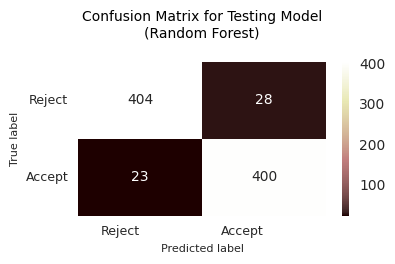

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 10}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
rf_accuracy_test = accuracy_score(y_test, y_test_pred_rf)
rf_precision_test = precision_score(y_test, y_test_pred_rf)
rf_recall_test = recall_score(y_test, y_test_pred_rf)
rf_f1_test = f1_score(y_test, y_test_pred_rf)

print("Accuracy: %.2f%%" % (rf_accuracy_test * 100.0))
print("Precision: %.2f%%" % (rf_precision_test * 100.0))
print("Recall: %.2f%%" % (rf_recall_test * 100.0))
print("F1 Score: %.2f%%" % (rf_f1_test * 100.0))

Accuracy: 94.04%
Precision: 93.46%
Recall: 94.56%
F1 Score: 94.01%


> **Random Forest Model Performance**
* The model has an accuracy value in training and testing models > 0.9. This value is considered a great score
* The training model has higher accuracy than the testing model by a difference of around 0.07

***Features Importance***

---



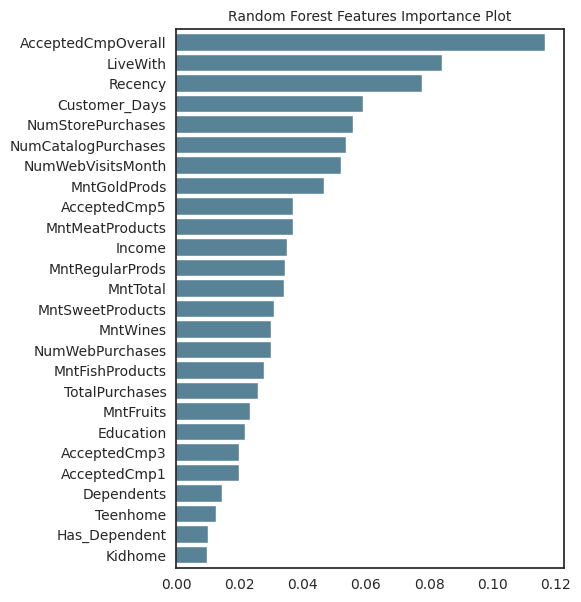

In [ ]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

sns.set_style('white')
plt.figure(figsize=(5,7))
fig = importances_rf.plot(kind ='barh', color='#588396ff', width=0.8)
plt.title('Random Forest Features Importance Plot', fontsize=10)
plt.show()

fig.figure.tight_layout()

###### **K-Nearest Neighbor**

In [ ]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

***Training Model***

---



In [ ]:
# predict data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1278
           1       0.85      0.99      0.91      1287

    accuracy                           0.91      2565
   macro avg       0.92      0.91      0.90      2565
weighted avg       0.92      0.91      0.90      2565



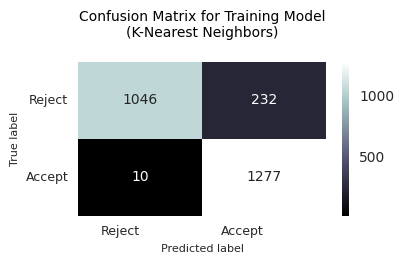

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
knn_accuracy_train = accuracy_score(y_train, y_train_pred_knn)
knn_precision_train = precision_score(y_train, y_train_pred_knn)
knn_recall_train = recall_score(y_train, y_train_pred_knn)
knn_f1_train = f1_score(y_train, y_train_pred_knn)

print("Accuracy: %.2f%%" % (knn_accuracy_train * 100.0))
print("Precision: %.2f%%" % (knn_precision_train * 100.0))
print("Recall: %.2f%%" % (knn_recall_train * 100.0))
print("F1 Score: %.2f%%" % (knn_f1_train * 100.0))

Accuracy: 90.57%
Precision: 84.63%
Recall: 99.22%
F1 Score: 91.34%


***Testing Model***

---



In [ ]:
# predict data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       432
           1       0.81      0.98      0.89       423

    accuracy                           0.88       855
   macro avg       0.90      0.88      0.88       855
weighted avg       0.90      0.88      0.88       855



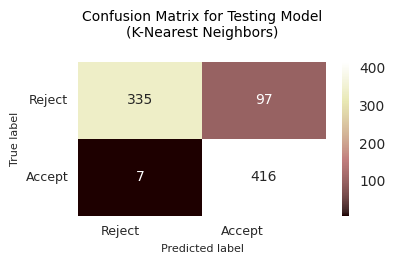

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
knn_accuracy_test = accuracy_score(y_test, y_test_pred_knn)
knn_precision_test = precision_score(y_test, y_test_pred_knn)
knn_recall_test = recall_score(y_test, y_test_pred_knn)
knn_f1_test = f1_score(y_test, y_test_pred_knn)

print("Accuracy: %.2f%%" % (knn_accuracy_test * 100.0))
print("Precision: %.2f%%" % (knn_precision_test * 100.0))
print("Recall: %.2f%%" % (knn_recall_test * 100.0))
print("F1 Score: %.2f%%" % (knn_f1_test * 100.0))

Accuracy: 87.84%
Precision: 81.09%
Recall: 98.35%
F1 Score: 88.89%


> **K-Nearest Neighbor Model Performance**
* The model has an accuracy value in training and testing models > 0.8. This value is considered a good score
* The training model has higher accuracy than the testing model by a difference of around 0.03

###### **Naive Bayes**

In [ ]:
nb_model = GaussianNB().fit(X_train, y_train)

***Training Model***

---



In [ ]:
# predict data train
y_train_pred_nb = nb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_nb))

Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1278
           1       0.75      0.61      0.67      1287

    accuracy                           0.70      2565
   macro avg       0.71      0.70      0.70      2565
weighted avg       0.71      0.70      0.70      2565



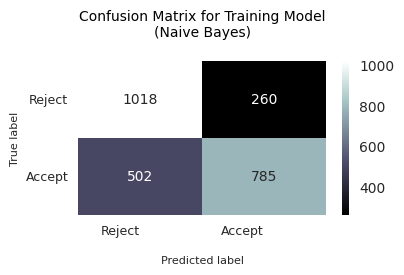

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nb)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Training Model\n(Naive Bayes)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('\nPredicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
nb_accuracy_train = accuracy_score(y_train, y_train_pred_nb)
nb_precision_train = precision_score(y_train, y_train_pred_nb)
nb_recall_train = recall_score(y_train, y_train_pred_nb)
nb_f1_train = f1_score(y_train, y_train_pred_nb)

print("Accuracy: %.2f%%" % (nb_accuracy_train * 100.0))
print("Precision: %.2f%%" % (nb_precision_train * 100.0))
print("Recall: %.2f%%" % (nb_recall_train * 100.0))
print("F1 Score: %.2f%%" % (nb_f1_train * 100.0))

Accuracy: 70.29%
Precision: 75.12%
Recall: 60.99%
F1 Score: 67.32%


***Testing Model***

---



In [ ]:
# predict data test
y_test_pred_nb = nb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_nb))

Classification Report Testing Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       432
           1       0.73      0.61      0.66       423

    accuracy                           0.69       855
   macro avg       0.70      0.69      0.69       855
weighted avg       0.70      0.69      0.69       855



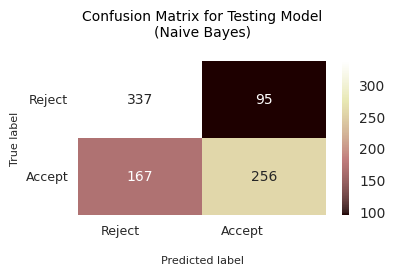

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nb)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Testing Model\n(Naive Bayes)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('\nPredicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
nb_accuracy_test = accuracy_score(y_test, y_test_pred_nb)
nb_precision_test = precision_score(y_test, y_test_pred_nb)
nb_recall_test = recall_score(y_test, y_test_pred_nb)
nb_f1_test = f1_score(y_test, y_test_pred_nb)

print("Accuracy: %.2f%%" % (nb_accuracy_test * 100.0))
print("Precision: %.2f%%" % (nb_precision_test * 100.0))
print("Recall: %.2f%%" % (nb_recall_test * 100.0))
print("F1 Score: %.2f%%" % (nb_f1_test * 100.0))

Accuracy: 69.36%
Precision: 72.93%
Recall: 60.52%
F1 Score: 66.15%


> **Naive Bayes Model Performance**
* The model has an accuracy value in training and testing models > 0.7. This value is considered a good score
* The training model has higher accuracy than the testing model by a difference of around 0.01

###### **XGBoost**

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

***Training Model***

---



In [ ]:
# predict data train
y_train_pred_xgb = xgb_model.predict(X_train)

# print classification report
print('Classification Report Testing Model (XGBoost)\n')
print(classification_report(y_train, y_train_pred_xgb))

Classification Report Testing Model (XGBoost)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1278
           1       0.99      0.99      0.99      1287

    accuracy                           0.99      2565
   macro avg       0.99      0.99      0.99      2565
weighted avg       0.99      0.99      0.99      2565



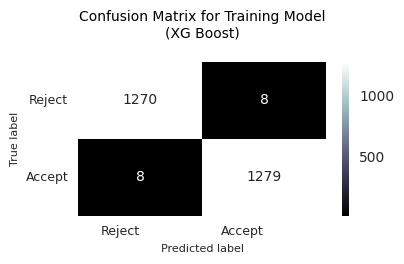

In [ ]:
# form confusion matrix as a dataF=frame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='bone')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Training Model\n(XG Boost)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
xgb_accuracy_train = accuracy_score(y_train, y_train_pred_xgb)
xgb_precision_train = precision_score(y_train, y_train_pred_xgb)
xgb_recall_train = recall_score(y_train, y_train_pred_xgb)
xgb_f1_train = f1_score(y_train, y_train_pred_xgb)

print("Accuracy: %.2f%%" % (xgb_accuracy_train * 100.0))
print("Precision: %.2f%%" % (xgb_precision_train * 100.0))
print("Recall: %.2f%%" % (xgb_recall_train * 100.0))
print("F1 Score: %.2f%%" % (xgb_f1_train * 100.0))

Accuracy: 99.38%
Precision: 99.38%
Recall: 99.38%
F1 Score: 99.38%


***Testing Model***

---



In [ ]:
# predict data test
y_test_pred_xgb = xgb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (XGBoost)\n')
print(classification_report(y_test, y_test_pred_xgb))

Classification Report Testing Model (XGBoost)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       432
           1       0.94      0.95      0.95       423

    accuracy                           0.95       855
   macro avg       0.95      0.95      0.95       855
weighted avg       0.95      0.95      0.95       855



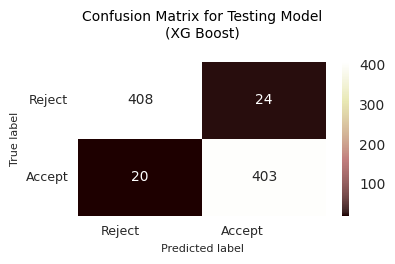

In [ ]:
# form confusion matrix as a dataframe
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb)), ('Reject', 'Accept'), ('Reject', 'Accept'))

# plot confusion matrix
fig = plt.figure(figsize = (4,2))
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=9)

plt.title('Confusion Matrix for Testing Model\n(XG Boost)\n', fontsize=10, color='black')
plt.ylabel('True label', fontsize=8)
plt.xlabel('Predicted label', fontsize=8)
plt.show()

In [ ]:
# evaluating the overall model with performance metrics
xgb_accuracy_test = accuracy_score(y_test, y_test_pred_xgb)
xgb_precision_test = precision_score(y_test, y_test_pred_xgb)
xgb_recall_test = recall_score(y_test, y_test_pred_xgb)
xgb_f1_test = f1_score(y_test, y_test_pred_xgb)

print("Accuracy: %.2f%%" % (xgb_accuracy_test * 100.0))
print("Precision: %.2f%%" % (xgb_precision_test * 100.0))
print("Recall: %.2f%%" % (xgb_recall_test * 100.0))
print("F1 Score: %.2f%%" % (xgb_f1_test * 100.0))

Accuracy: 94.85%
Precision: 94.38%
Recall: 95.27%
F1 Score: 94.82%


> **XGBoost Model Performance**
* The model has an accuracy value in training and testing models > 0.9. This value is considered a great score
* The training model has higher accuracy than the testing model by a difference of around 0.07

***Features Importance***

---



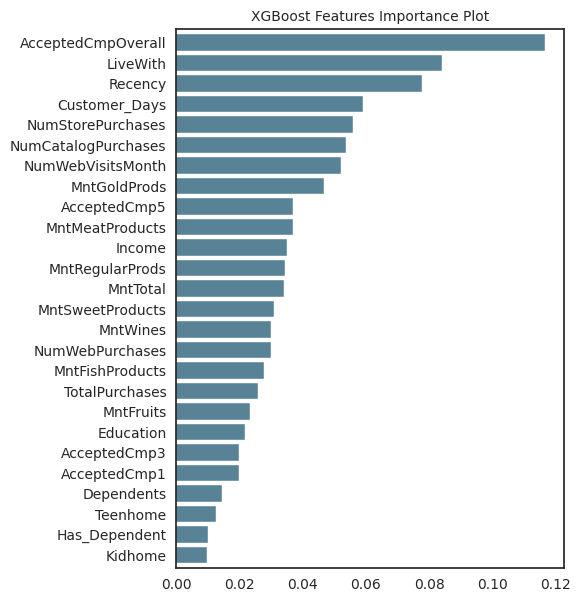

In [ ]:
# important features
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=True)

sns.set_style('white')
plt.figure(figsize=(5,7))
fig = importances_rf.plot(kind ='barh', color='#588396ff', width=0.8)
plt.title('XGBoost Features Importance Plot', fontsize=10)
plt.show()

fig.figure.tight_layout()

##### **Model Evaluation**

All models are evaluated and compared by looking at the accuracy values of each training and testing model. The accuracy value is the ratio of the number of correct predictions to the total number of input samples. The following are the accuracy value of each model

In [ ]:
acc = pd.DataFrame([["Logistic Regression", log_accuracy_train, log_accuracy_test],
                        ["Decision Tree", dt_accuracy_train, dt_accuracy_test],
                        ["Random Forest", rf_accuracy_train, rf_accuracy_test],
                        ["K-Nearest Neighbor", knn_accuracy_train, knn_accuracy_test],
                        ["Naive Bayes", nb_accuracy_train, nb_accuracy_test],
                        ["XGBoost  Classifier", xgb_accuracy_train, xgb_accuracy_test],])

acc.columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"]

acc.style.highlight_max(color="rosybrown", axis=0)

,Models,Training Accuracy Score,Testing Accuracy Score
0,Logistic Regression,0.848733,0.861988
1,Decision Tree,0.993762,0.874854
2,Random Forest,0.993762,0.940351
3,K-Nearest Neighbor,0.905653,0.878363
4,Naive Bayes,0.702924,0.693567
5,XGBoost Classifier,0.993762,0.948538


* The XGBoost model is the best model for predicting which customers are most likely to response to the next campaign.
* Compared to the Random Forest models, which have the same high accuracy values in the training set. The difference in accuracy between training and testing sets on the xgboost model is smaller than in the random forest model.

In [ ]:
test_compare = pd.DataFrame(
    [   ['Logistic Regression', log_accuracy_test, log_precision_test, log_recall_test, log_f1_test],
        ['Decision Tree', dt_accuracy_test, dt_precision_test, dt_recall_test, dt_f1_test],
        ['Random Forest', rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1_test],
        ['K-Nearest Neighbors', knn_accuracy_test, knn_precision_test, knn_recall_test, knn_f1_test],
        ['Naive Bayes', nb_accuracy_test, nb_precision_test, nb_recall_test, nb_f1_test],
        ['XGBoost', xgb_accuracy_test, xgb_precision_test, xgb_recall_test, xgb_f1_test]
    ],
    columns = ['model', 'accuracy', 'precision', 'recall', 'f1_score']
)

test_compare.style.highlight_max(color="rosybrown")

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.861988,0.835165,0.898345,0.865604
1,Decision Tree,0.874854,0.867442,0.881797,0.874560
2,Random Forest,0.940351,0.934579,0.945626,0.940071
3,K-Nearest Neighbors,0.878363,0.810916,0.983452,0.888889
4,Naive Bayes,0.693567,0.729345,0.605201,0.661499
5,XGBoost,0.948538,0.943794,0.952719,0.948235


* XGBoost models performs the best in terms of accuracy, precision, and F1 Score
* Therefore at this point it is recommended to use xgboost model to predict customer's response to the next campaign